# Projeto Estatística II - Grupo 3
Grupo: Alex Moulin, Antonio Zanutto, Carolina Yumi, Gabriel Mourão, Haroldo Viana, Rafael RIbeiro e Thaís Falcão

## BRAIN STORM

- Objetivo deste projeto é lidar com um problema real e tentar resolvê-lo utilizando um modelo de regressão.
- Realizamos uma análise abrangente, explicando cada etapa e justificando cada ação escolhida.
- Incluímos gráficos e tabelas comparativas para auxiliar na visualização dos dados.

## BASE DE DADOS

A base de dados escolhida foi obtida no Kaggle e pode ser verificada <a href="https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent?select=houses_to_rent_v2.csv" target="_blank">clicando aqui</a>.

A base de dados é composta pelas seguintes características de imóveis:
- Cidade do imóvel
- Área (m²) do imóvel
- Quantidade de quartos
- Quantidade de banheiros
- Quantidade de vagas de estacionamento
- Andar em que o imóvel está localizado
- Se é permitido ter animais de estimação
- Se é mobiliado ou não
- Taxa de condomínio (R$)
- Aluguel (R$)
- IPTU (R$)
- Seguro contra incêndio (R$)
- Total (R$)

## INICIANDO O PROJETO

**Carregando as bibliotecas**

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Carregando a base de dados**

In [314]:
df = pd.read_csv(r'db\houses_to_rent_v2.csv')
# Verificando as primeiras linhas da base de dados
df.head()

,Cidade,Área (m2),Quartos,Banheiro,Vagas de Est.,Andar,Permitido pets,Mobiliado,Taxa de Cond. (R$),Aluguel (R$),IPTU (R$),Seguro incêndio (R$),Total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


**Definindo o problema**

- O objetivo desse projeto é desenvolver um modelo que prevê os preços de aluguel de imovéis a partir de suas características.

## ANÁLISE E EXPLORAÇÃO DOS DADOS

**Faça uma análise detalhada do conjunto de dados escolhidos.**

- Identifique os tipos de dados de cada coluna e caso seja necessário, faça uma conversão no tipo de dado. Em muitas situações é interessante renomear as colunas. OK
- Verifique se existem valores nulos, e caso existam, elabore uma estrategia para lidar com eles (apagar eles, substituir com outro valor, etc.). OK
- Faça uma análise estatistica dos dados para determinar aqueles que provavelmente não vão contribuir durante a modelagem (anomalías e outrliers).
- Pode aplicar escalonamento nos dados, para manter todos eles na mesma escala.
- Caso tenha features do tipo categorico e queria usar elas durante a modelagem, transforme elas para um valor numerico (encoding!).

**Identificando os tipos de dados**

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cidade                10692 non-null  object
 1   Área (m2)             10692 non-null  int64 
 2   Quartos               10692 non-null  int64 
 3   Banheiro              10692 non-null  int64 
 4   Vagas de Est.         10692 non-null  int64 
 5   Andar                 10692 non-null  object
 6   Permitido pets        10692 non-null  object
 7   Mobiliado             10692 non-null  object
 8   Taxa de Cond. (R$)    10692 non-null  int64 
 9   Aluguel (R$)          10692 non-null  int64 
 10  IPTU (R$)             10692 non-null  int64 
 11  Seguro incêndio (R$)  10692 non-null  int64 
 12  Total (R$)            10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


A variável 'Andar' deveria ser numérica e as variáveis 'Permitido pets' e 'Mobiliado' deveriam ser booleanas.

In [316]:
df.Andar.unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

A variável andar tem um valor '-', que indica que o imóvel não tem andar associado (ou seja, é uma casa e não um apartamento). Vamos substituir esses valores por zero e transformar essa coluna em inteira!

In [317]:
df.Andar = df.Andar.apply(lambda x: 0 if x == '-' else int(x))
df.Andar.astype(int)
df.Andar

0         7
1        20
2         6
3         2
4         1
         ..
10687     5
10688    17
10689     8
10690     8
10691     0
Name: Andar, Length: 10692, dtype: int64

Optou-se por criar uma variável 'Apartamento' booleana, com 0 indicando casa e 1 indicando apartamento.

**Criando variável booleana Apartamento**

In [318]:
df['Apartamento'] = df['Andar'].apply(lambda x: 0 if x == 0 else 1)
df

,Cidade,Área (m2),Quartos,Banheiro,Vagas de Est.,Andar,Permitido pets,Mobiliado,Taxa de Cond. (R$),Aluguel (R$),IPTU (R$),Seguro incêndio (R$),Total (R$),Apartamento
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,1
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,1
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,1
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,1
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926,1
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260,1
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390,1
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020,1


**Transformando variável 'Permitido pets' em booleana**

In [319]:
df['Permitido pets'] = df['Permitido pets'].apply(lambda x: 1 if x == 'acept' else 0)
df['Permitido pets']


0        1
1        1
2        1
3        1
4        0
        ..
10687    0
10688    1
10689    0
10690    1
10691    1
Name: Permitido pets, Length: 10692, dtype: int64

**Transformando variável 'Mobiliado' em booleana**

In [320]:
df['Mobiliado'] = df['Mobiliado'].apply(lambda x: 1 if x == 'furnished' else 0)
df['Mobiliado']

0        1
1        0
2        0
3        0
4        0
        ..
10687    1
10688    0
10689    1
10690    1
10691    0
Name: Mobiliado, Length: 10692, dtype: int64

**Renomeando as colunas**

In [321]:
df = df.rename(columns={'Área (m2)': 'Area', 'Vagas de Est.': 'Vagas_Est', 'Permitido pets': 'Permitido_pets', 'Taxa de Cond. (R$)':'Taxa_Cond', 
                   'Aluguel (R$)': 'Aluguel','IPTU (R$)': 'IPTU', 'Seguro incêndio (R$)': 'Seguro_incendio', 'Total (R$)': 'Total'})

**Quantidade de registros**

In [322]:
print(f'O dataframe possui {df.shape[0]} registros')

O dataframe possui 10692 registros


**Removendo linhas duplicadas**

In [323]:
df = df.drop_duplicates()
df = df.drop(columns=['Seguro_incendio','Total'])
print(f'O dataframe agora possui {df.shape[0]} registros')

O dataframe agora possui 10334 registros


**Verificando se existem dados nulos**

In [324]:
qtd_faltantes = df.isnull().sum()
df_faltantes =  pd.DataFrame({'Dados faltantes': qtd_faltantes})
pd.set_option('display.max_rows', 15)
df_faltantes

,Dados faltantes
Cidade,0
Area,0
Quartos,0
Banheiro,0
Vagas_Est,0
Andar,0
Permitido_pets,0
Mobiliado,0
Taxa_Cond,0
Aluguel,0


**Medidas descritivas das variáveis**

In [325]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,10334.0,152.439423,545.875595,11.0,59.00,95.0,190.00,46335.0
Quartos,10334.0,2.539965,1.168185,1.0,2.00,3.0,3.00,13.0
Banheiro,10334.0,2.268725,1.414650,1.0,1.00,2.0,3.00,10.0
Vagas_Est,10334.0,1.644475,1.598527,0.0,1.00,1.0,2.00,12.0
Andar,10334.0,5.100929,6.067906,0.0,1.00,3.0,8.00,301.0
Permitido_pets,10334.0,0.781498,0.413250,0.0,1.00,1.0,1.00,1.0
Mobiliado,10334.0,0.243371,0.429138,0.0,0.00,0.0,0.00,1.0
Taxa_Cond,10334.0,1091.243952,11446.092263,0.0,180.00,571.0,1286.75,1117000.0
Aluguel,10334.0,3966.296013,3436.190007,450.0,1598.25,2750.0,5000.00,45000.0
IPTU,10334.0,376.929263,3160.602165,0.0,41.00,130.0,389.75,313700.0


## ANÁLISE DAS VARIÁVEIS

**Nome das colunas**

In [326]:
df.columns

Index(['Cidade', 'Area', 'Quartos', 'Banheiro', 'Vagas_Est', 'Andar',
       'Permitido_pets', 'Mobiliado', 'Taxa_Cond', 'Aluguel', 'IPTU',
       'Apartamento'],
      dtype='object')

**Separação das colunas por tipo**

In [327]:
col_num = ['Area', 'Quartos', 'Banheiro', 'Vagas_Est', 'Andar', 'Taxa_Cond', 'Aluguel', 'IPTU']
col_bool = ['Permitido_pets', 'Mobiliado','Apartamento']
col_cat = ['Cidade']

### Variáveis numéricas

**Medidas descritivas das variáveis numéricas**

In [328]:
for col in col_num:
    display(df[col].describe())
    print('')

count    10334.000000
mean       152.439423
std        545.875595
min         11.000000
25%         59.000000
50%         95.000000
75%        190.000000
max      46335.000000
Name: Area, dtype: float64

count    10334.000000
mean         2.539965
std          1.168185
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         13.000000
Name: Quartos, dtype: float64

count    10334.000000
mean         2.268725
std          1.414650
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: Banheiro, dtype: float64

count    10334.000000
mean         1.644475
std          1.598527
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         12.000000
Name: Vagas_Est, dtype: float64

count    10334.000000
mean         5.100929
std          6.067906
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        301.000000
Name: Andar, dtype: float64

count    1.033400e+04
mean     1.091244e+03
std      1.144609e+04
min      0.000000e+00
25%      1.800000e+02
50%      5.710000e+02
75%      1.286750e+03
max      1.117000e+06
Name: Taxa_Cond, dtype: float64

count    10334.000000
mean      3966.296013
std       3436.190007
min        450.000000
25%       1598.250000
50%       2750.000000
75%       5000.000000
max      45000.000000
Name: Aluguel, dtype: float64

count     10334.000000
mean        376.929263
std        3160.602165
min           0.000000
25%          41.000000
50%         130.000000
75%         389.750000
max      313700.000000
Name: IPTU, dtype: float64

**Distribuição das variáveis numéricas**

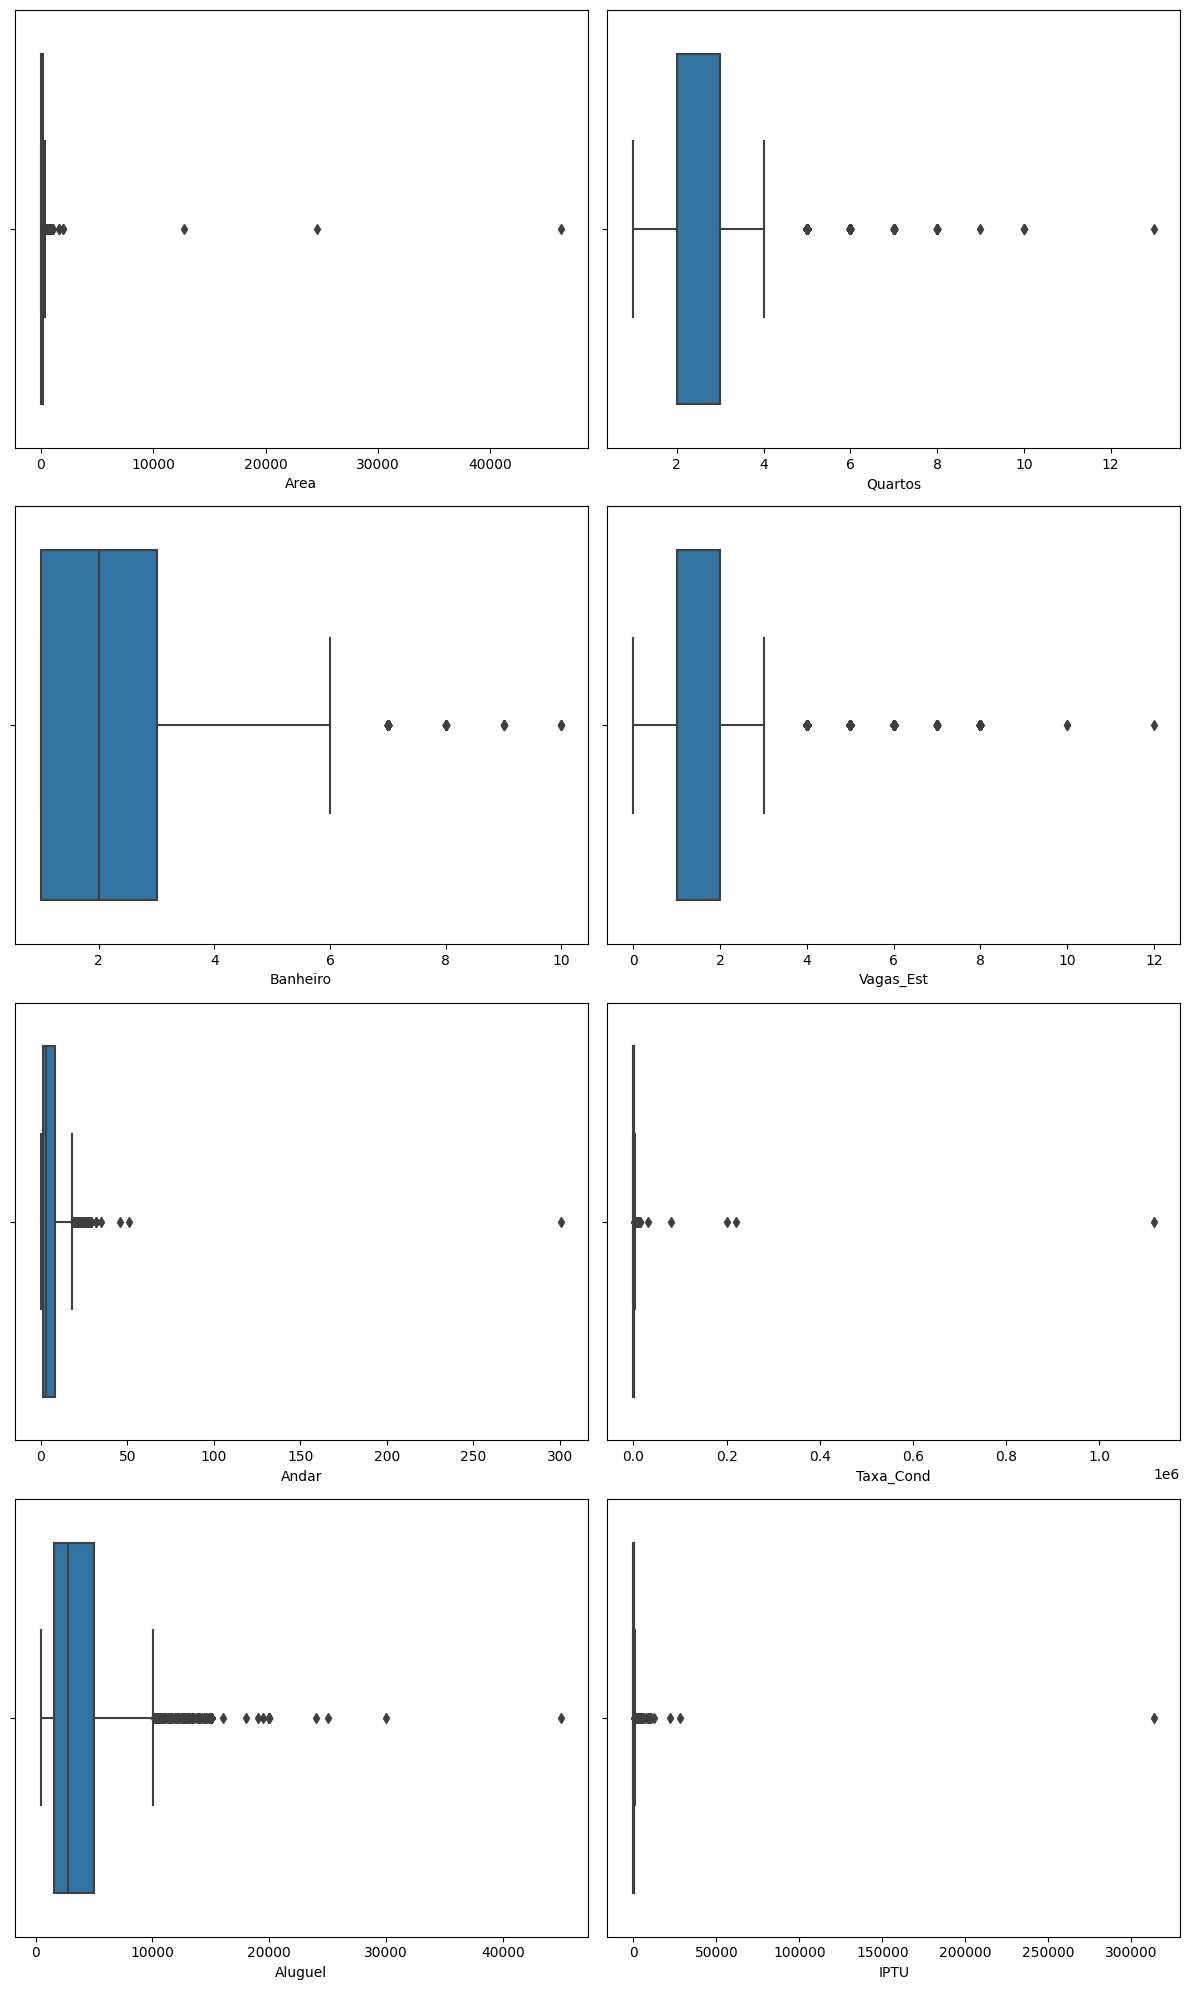

In [329]:
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
for i in range(0,8):
    sns.boxplot(ax=axes[i//2,i%2], data=df, x=col_num[i])
plt.tight_layout()

**Removendo anomalias**

In [330]:
df = df[df.Andar < 50] # Removendo andares maiores que 50
df = df[df.Taxa_Cond < 20000] # Removendo taxa de condomínio maiores que 20000
df = df[df.IPTU < 50000] # Removendo IPTU maiores que 50000

**Removendo observações com IPTU = 0**

In [331]:
df = df[df.IPTU != 0]

**Verificando a distribuição das variáveis após a remoção de anomalias**

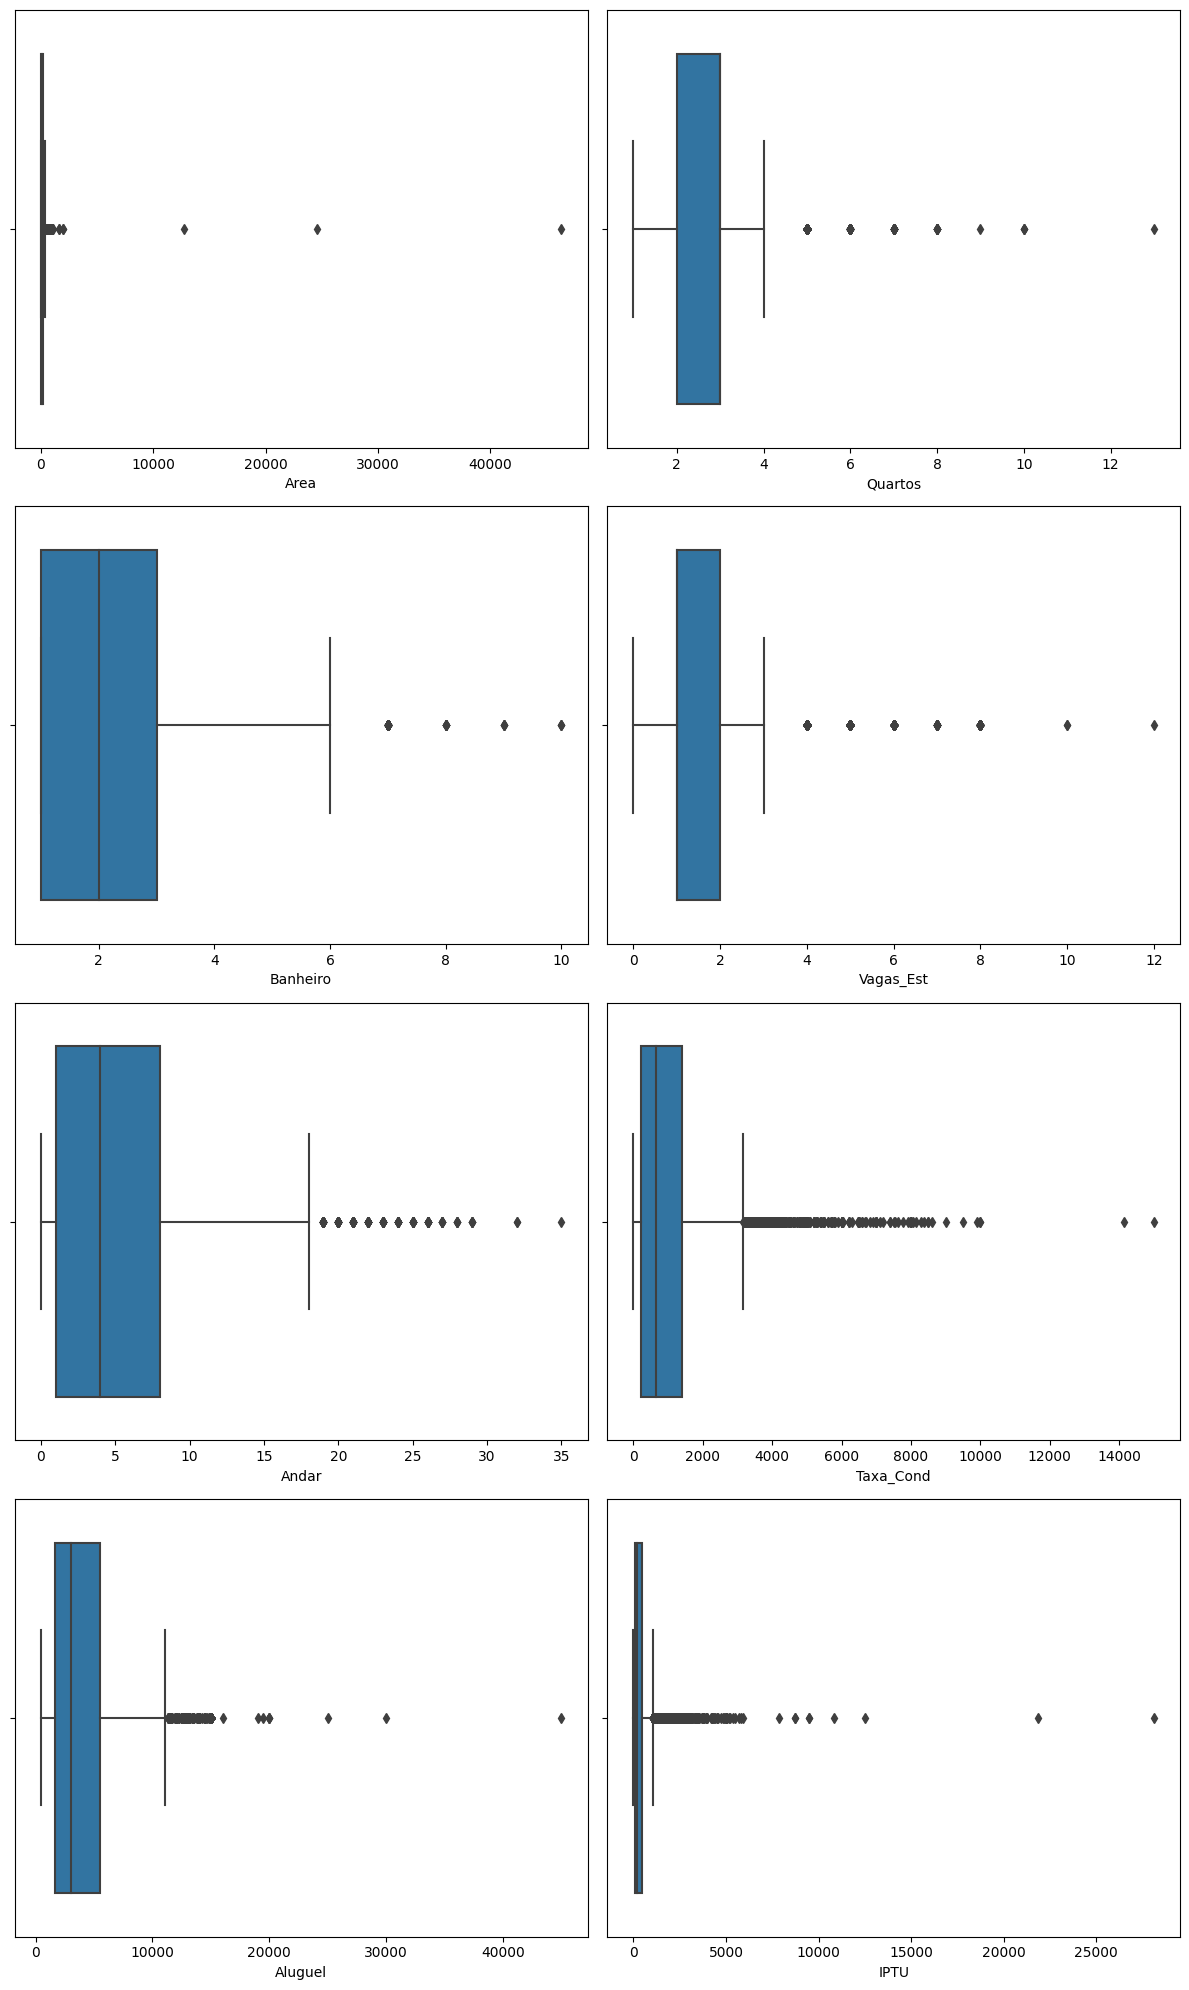

In [332]:
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
for i in range(0,8):
    sns.boxplot(ax=axes[i//2,i%2], data=df, x=col_num[i])
plt.tight_layout()

**Distribuição de frequência das variáveis numéricas**

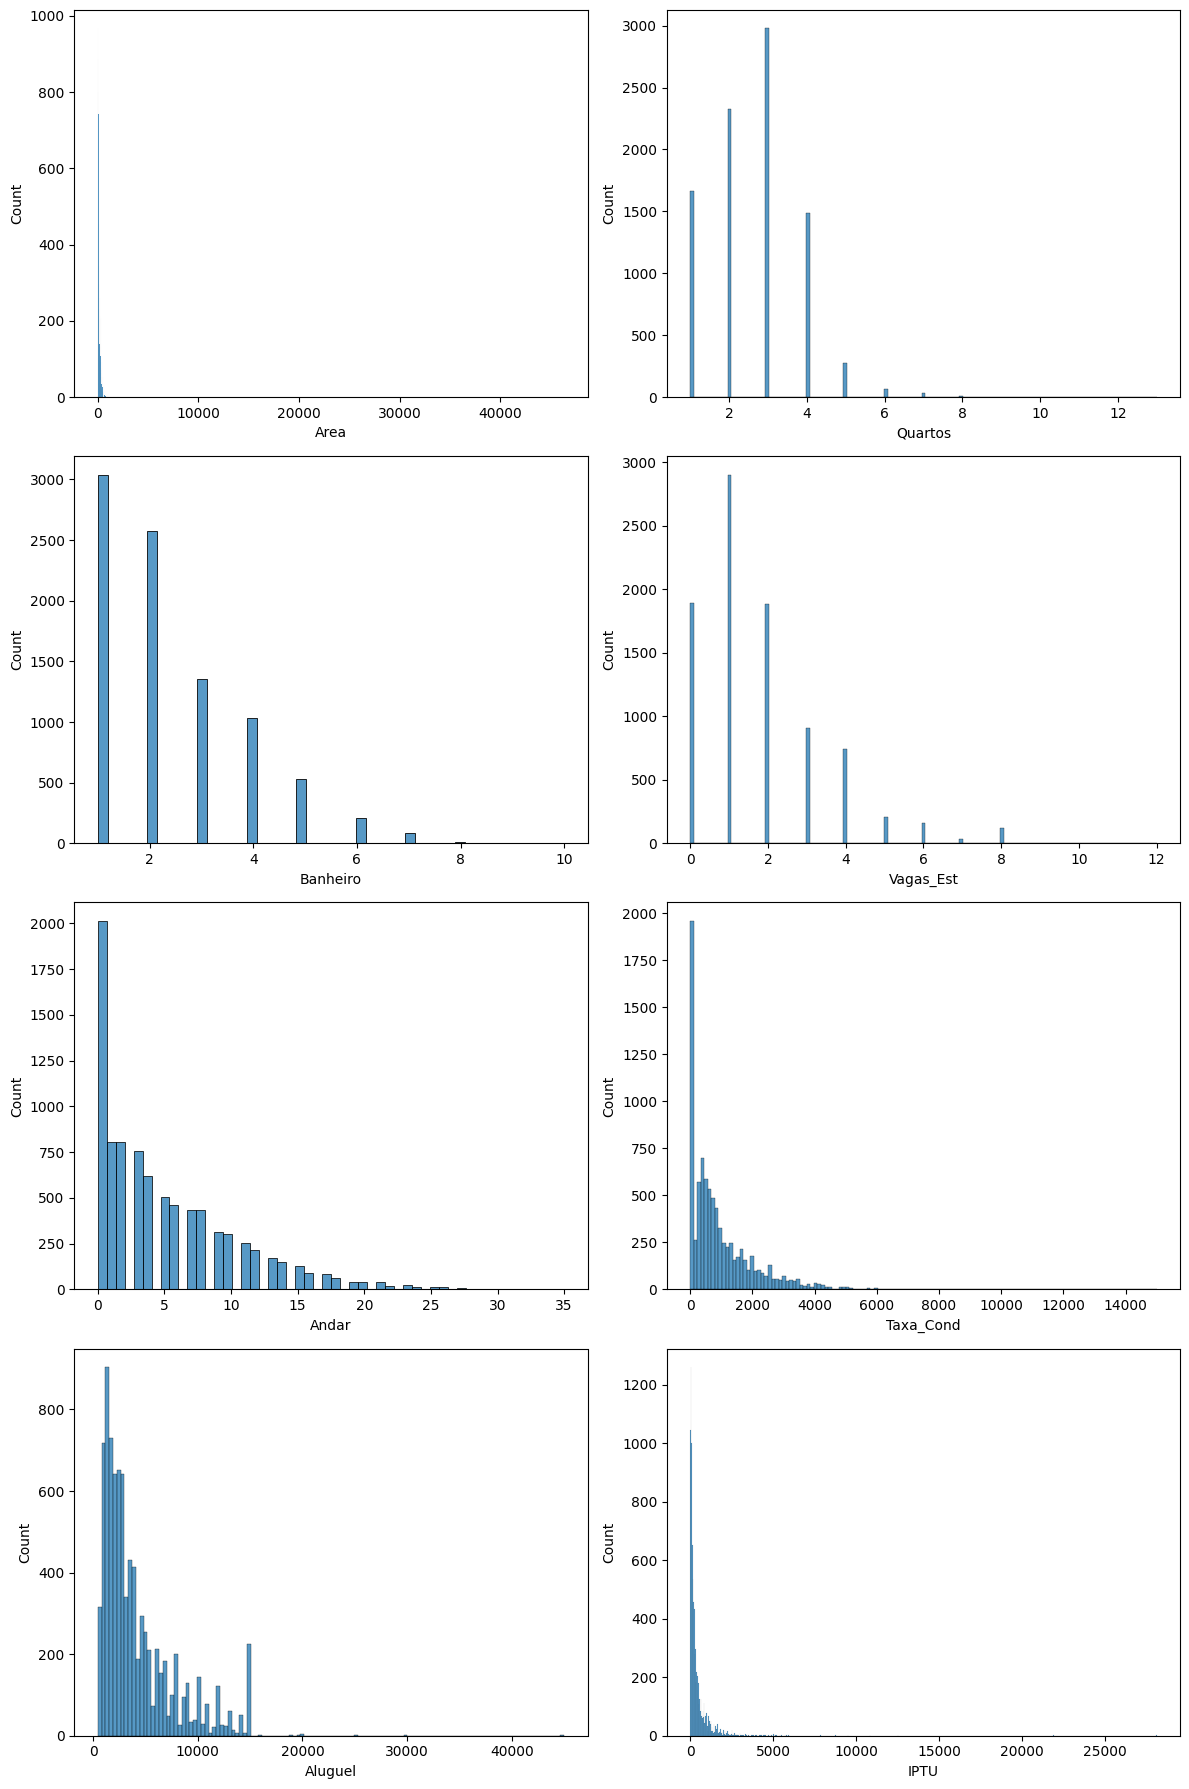

In [333]:
fig, axes = plt.subplots(4, 2, figsize=(12, 18))

for i in range(0,8):
    sns.histplot(ax=axes[i//2,i%2], data=df, x=col_num[i])
plt.tight_layout()

**Assimetria das variáveis numéricas**

In [334]:
print('Skewness das variáveis:')
for i in col_num:
    print(i,':',df[i].skew()) #assimetria a direita

Skewness das variáveis:
Area : 63.90708707390644
Quartos : 0.6336476062172806
Banheiro : 1.0911505848409093
Vagas_Est : 1.3935196695097118
Andar : 1.3048789512216
Taxa_Cond : 2.438560793119367
Aluguel : 1.6953487245099692
IPTU : 12.353159060963232


**Assimetria do Log das variáveis numéricas**

In [335]:
print('Skewness dos logs das variáveis:')
for i in col_num:
    print('Log',i,':',np.log10(df[i][df[i]>0]).skew()) #assimetria a direita

Skewness dos logs das variáveis:
Log Area : 0.34110843751906217
Log Quartos : -0.530566192487203
Log Banheiro : 0.1780395881821674
Log Vagas_Est : 0.47228971344616244
Log Andar : -0.31052416826106133
Log Taxa_Cond : -1.3259882561764207
Log Aluguel : 0.12976683073192793
Log IPTU : -0.24030714554302254


**Métrica de localização**

O IPTU é um imposto cujo valor é calculado por uma aliquota definida pela prefeitura para cada parte da cidade multiplicada pela área do imóvel. É de conhecimento geral que a valorização do imóvel (tanto pra venda, quanto para aluguel), depende tanto de sua localização quanto do imóvel em si, portanto, calcular essa alíquota do imóvel pode ser importante para a construção de um modelo mais interessante.

In [336]:
df['aliquota'] = df['IPTU']/df['Area']
df.head()

,Cidade,Area,Quartos,Banheiro,Vagas_Est,Andar,Permitido_pets,Mobiliado,Taxa_Cond,Aluguel,IPTU,Apartamento,aliquota
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,1,3.014286
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,1,5.468750
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,1,0.431373
4,São Paulo,25,1,1,0,1,0,0,0,800,25,1,1.000000
5,São Paulo,376,3,3,7,0,1,0,0,8000,834,0,2.218085


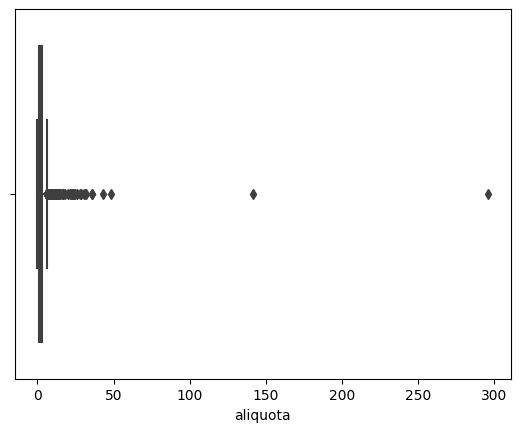

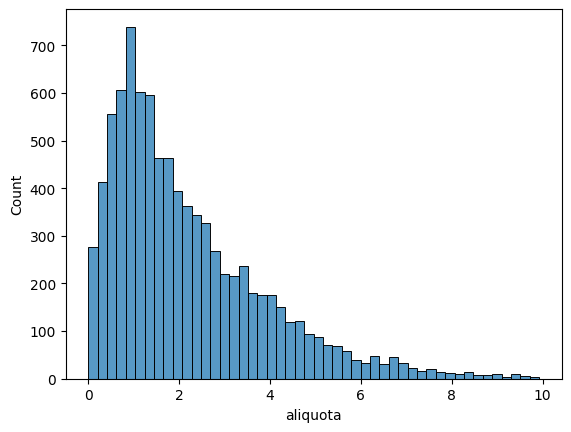

In [337]:
sns.boxplot(data=df, x='aliquota')
plt.show()

sns.histplot(data=df[df.aliquota <10], x='aliquota')
plt.show()


**Tabela de correlação entre variáveis numéricas**

In [338]:
correlacao = df[col_num + col_bool + ['aliquota']].corr()
display(correlacao)

,Area,Quartos,Banheiro,Vagas_Est,Andar,Taxa_Cond,Aluguel,IPTU,Permitido_pets,Mobiliado,Apartamento,aliquota
Area,1.000000,0.182231,0.216015,0.182433,-0.017164,0.072205,0.169128,0.179150,0.034296,0.009120,-0.087810,0.008294
Quartos,0.182231,1.000000,0.722531,0.597815,-0.119038,0.261005,0.522539,0.391221,0.144382,-0.079249,-0.293339,0.075871
Banheiro,0.216015,0.722531,1.000000,0.684137,-0.009271,0.395225,0.657257,0.506586,0.098956,0.018983,-0.254700,0.144263
Vagas_Est,0.182433,0.597815,0.684137,1.000000,-0.050885,0.260507,0.558962,0.462222,0.108654,-0.010511,-0.326073,0.132359
Andar,-0.017164,-0.119038,-0.009271,-0.050885,1.000000,0.351698,0.073671,0.054202,-0.060674,0.138835,0.524354,0.105687
Taxa_Cond,0.072205,0.261005,0.395225,0.260507,0.351698,1.000000,0.429731,0.424745,-0.003755,0.119906,0.396430,0.228109
Aluguel,0.169128,0.522539,0.657257,0.558962,0.073671,0.429731,1.000000,0.510051,0.046252,0.164086,-0.196374,0.180509
IPTU,0.179150,0.391221,0.506586,0.462222,0.054202,0.424745,0.510051,1.000000,0.050755,0.024654,-0.097975,0.661458
Permitido_pets,0.034296,0.144382,0.098956,0.108654,-0.060674,-0.003755,0.046252,0.050755,1.000000,-0.089667,-0.071676,-0.011244
Mobiliado,0.009120,-0.079249,0.018983,-0.010511,0.138835,0.119906,0.164086,0.024654,-0.089667,1.000000,0.128292,0.064494


**Heatmap da correlação das variáveis numéricas**

<Axes: >

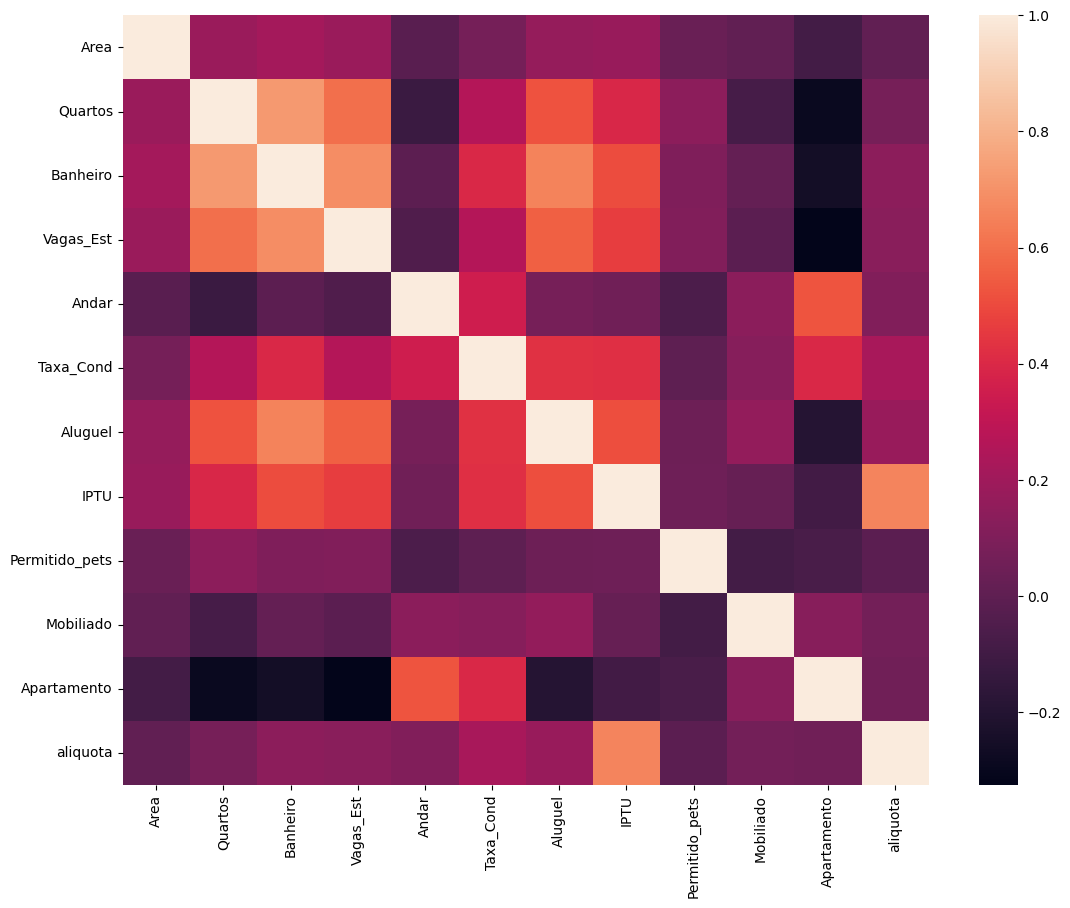

In [339]:
plt.figure(figsize=(13, 10))
sns.heatmap(correlacao)

In [340]:
(correlacao['Aluguel']).sort_values(ascending = False)

Aluguel           1.000000
Banheiro          0.657257
Vagas_Est         0.558962
Quartos           0.522539
IPTU              0.510051
Taxa_Cond         0.429731
aliquota          0.180509
Area              0.169128
Mobiliado         0.164086
Andar             0.073671
Permitido_pets    0.046252
Apartamento      -0.196374
Name: Aluguel, dtype: float64

Os atributos que apresentam maior correlação com a variável 'Aluguel' (positiva e negativa) são:
* Banheiro
* Vagas_Est
* Quartos
* IPTU
* Taxa_Cond

\
 Após tratamento de dados notou-se que a Taxa de condomínio apresenta uma boa correlação, enquanto a aliquota não apresentou o resultado esperado.

**Quantidade de observações por cidade**

In [341]:
for i in df.Cidade.unique():
    print(i,df[df.Cidade==i].shape[0])

São Paulo 4733
Porto Alegre 1031
Rio de Janeiro 1274
Campinas 733
Belo Horizonte 1075


## MODELAGEM

- Problema: regressão. Desejamos estimar o valor de aluguel dadas as características do imóvel.
- Vamos utilizar uma regressão linear para resolver este problema!

**Importando a classe do estimador**

In [459]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [507]:
col_imp = (correlacao['Aluguel'][correlacao['Aluguel']>0.4]).sort_values(ascending = False).index[1:]
col_imp

Index(['Banheiro', 'Vagas_Est', 'Quartos', 'IPTU', 'Taxa_Cond'], dtype='object')

In [508]:
def mape (teste,pred):
    soma = 0
    for pred_i,teste_i in zip(pred,teste):
        soma  = soma + abs((pred_i - teste_i)/teste_i)
    return soma/len(pred)

tab_erro = pd.DataFrame (columns = ['R²','MAE', 'MSE','RMSE','MAPE'],index = ['Todas','Campinas','São Paulo','Porto Alegre','Rio de Janeiro','Belo Horizonte'])

In [510]:
#Considerando como features da regressão multilinear: Banheiro, Vagas_Est, Quartos e IPTU
X = df[col_imp]

y = df["Aluguel"]

In [511]:
X

,Banheiro,Vagas_Est,Quartos,IPTU,Taxa_Cond
0,1,1,2,211,2065
1,4,0,4,1750,1200
3,1,0,2,22,270
4,1,0,1,25,0
5,3,7,3,834,0
...,...,...,...,...,...
10687,1,1,2,24,402
10688,4,4,4,973,3100
10689,3,0,3,332,980
10690,2,2,2,279,1585


In [512]:
y

0         3300
1         4960
3         1112
4          800
5         8000
         ...  
10687     1478
10688    15000
10689     6000
10690    12000
10691     1400
Name: Aluguel, Length: 8846, dtype: int64

In [513]:
#Importando a classe do estimador

from sklearn.linear_model import LinearRegression

In [514]:
#Instanciando a classe do estimador, escolhendo os hiperparâmetros desejados

regressor = LinearRegression()

In [515]:
#Separando os dados em treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [516]:
X.shape, y.shape

((8846, 5), (8846,))

In [517]:
X_test.shape, y_test.shape

((1770, 5), (1770,))

In [518]:
X_train.shape, y_train.shape

((7076, 5), (7076,))

In [519]:
#normalização dos dados
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [520]:
#Treinando o modelo com os dados de teste
regressor.fit(X_train, y_train)

LinearRegression()

In [521]:
#Verificando os coeficientes
vars(regressor)

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 5,
 'coef_': array([ 7931.26119852,  4270.90821484,  1739.22963701, 21247.33144207,
         6963.27220308]),
 'rank_': 5,
 'singular_': array([18.57629524,  7.31778521,  6.59975928,  5.60973205,  1.84910341]),
 'intercept_': 1254.6743455137844}

In [522]:
#Observando o intercepto

regressor.intercept_

1254.6743455137844

In [523]:
#Observando os coeficientes

regressor.coef_

array([ 7931.26119852,  4270.90821484,  1739.22963701, 21247.33144207,
        6963.27220308])

Esses três valores são os coeficientes para cada um de nossos recursos na mesma ordem em que os temos em nossos dados. Para ver uma lista com seus nomes, podemos usar o atributo columns para o dataframe:

In [524]:
feature_names = X.columns
feature_names

Index(['Banheiro', 'Vagas_Est', 'Quartos', 'IPTU', 'Taxa_Cond'], dtype='object')

Considerando que é um pouco difícil ver características e coeficientes juntos dessa forma, podemos organizá-los melhor em formato de tabela.

Para fazer isso, podemos atribuir nossos nomes de colunas a uma variável feature_names e nossos coeficientes a uma variável model_coefficients. Depois disso, podemos criar um dataframe com nossos recursos como um índice e nossos coeficientes como valores de coluna chamados coefficients_df:

In [525]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

           Coefficient value
Banheiro         7931.261199
Vagas_Est        4270.908215
Quartos          1739.229637
IPTU            21247.331442
Taxa_Cond        6963.272203


#### 5. Use o modelo treinado para **fazer previsões** usando os **dados de teste** (ou **de validação**)

In [526]:
X_test[:10]

array([[0.        , 0.08333333, 0.        , 0.00412532, 0.03893333],
       [0.        , 0.08333333, 0.11111111, 0.00220491, 0.036     ],
       [0.44444444, 0.16666667, 0.22222222, 0.03552758, 0.23066667],
       [0.22222222, 0.08333333, 0.33333333, 0.02041324, 0.16766667],
       [0.        , 0.        , 0.        , 0.00074683, 0.0204    ],
       [0.22222222, 0.16666667, 0.22222222, 0.01034887, 0.        ],
       [0.        , 0.        , 0.        , 0.00312956, 0.02653333],
       [0.22222222, 0.08333333, 0.11111111, 0.00782389, 0.05686667],
       [0.11111111, 0.08333333, 0.        , 0.0074327 , 0.07333333],
       [0.22222222, 0.16666667, 0.22222222, 0.01436751, 0.09      ]])

In [527]:
y_test.values[-10:]

array([ 4500,   990,  2500,  5000, 15000,  7000,   700,  1610,  1700,
         680], dtype=int64)

In [528]:
y_pred = regressor.predict(X_test)
y_pred[-10:]

array([7239.43666474, 1349.67639027, 3809.40991305, 6316.06205758,
       8126.2214247 , 5261.59949546, 1298.50041414, 1528.41477586,
       1814.24397578, 2208.5543715 ])

#### 6. **Avalie a performance do modelo com base nas previsões acima**

Lembre que você pode treinar e avaliar muito modelos, e no final escolher aquele que teve melhor performance respeito à metrica escolhida.

In [529]:
residuo = y_test - y_pred
residuo

9755      420.661102
4219     -801.357456
5051     3760.946128
10662   -1054.064659
3162      -12.593158
            ...     
5337     1738.400505
8502     -598.500414
7259       81.585224
1857     -114.243976
6665    -1528.554371
Name: Aluguel, Length: 1770, dtype: float64

In [530]:
residuo.describe()

count     1770.000000
mean        31.010839
std       2466.585215
min     -14956.360399
25%      -1293.601044
50%       -426.003170
75%        831.540171
max      11401.983381
Name: Aluguel, dtype: float64

<Axes: title={'center': 'valor predito vs valor real'}, xlabel='Aluguel'>

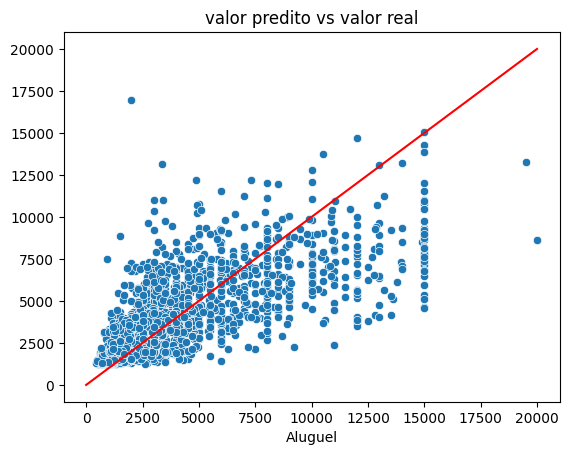

In [531]:
# faça um scatterplot do valor predito pelo valor real
plt.title("valor predito vs valor real")
x = np.linspace(0, 20000, 1000)
y = x
plt.plot(x, y, color="red")

sns.scatterplot(x=y_test, y=y_pred)

In [532]:
y_train.mean()

4185.26031656303

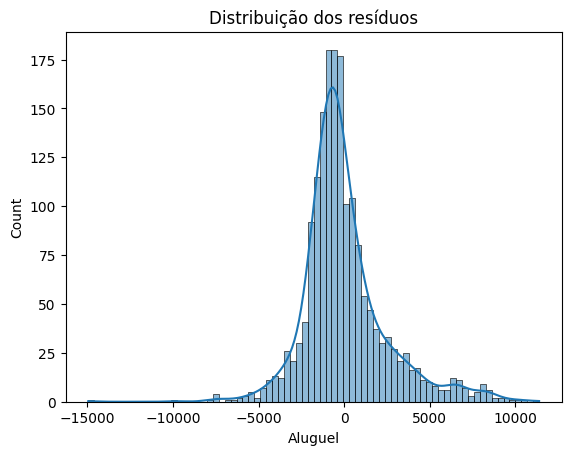

In [533]:
plt.title("Distribuição dos resíduos")
sns.histplot(y_test-y_pred, kde=True)
plt.show()

In [534]:
#Métricas de avaliação do modelo usando todos as colunas
from sklearn import metrics
cidade = 'Todas'
tab_erro['R²'][cidade] = metrics.r2_score(y_test, y_pred)
tab_erro['MAE'][cidade] = metrics.mean_absolute_error(y_test, y_pred)
tab_erro['MSE'][cidade] = metrics.mean_squared_error(y_test, y_pred)
tab_erro['RMSE'][cidade] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
tab_erro['MAPE'][cidade] = mape(y_test, y_pred)

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', mape(y_test, y_pred))

R^2: 0.5058235127029025
MAE: 1715.9748115697307
MSE: 6081566.985016802
RMSE: 2466.0833288874896
MAPE: 0.5394558842444741


Como o modelo não possui boas métricas de avaliação, serão testados novos modelos realizando a separação do dataset por cidade, porque esse parâmetro é fundamental na tabelação de preços de imóveis.

# Campinas

In [535]:
df_ca = df[df.Cidade == 'Campinas']
df_ca.head()


,Cidade,Area,Quartos,Banheiro,Vagas_Est,Andar,Permitido_pets,Mobiliado,Taxa_Cond,Aluguel,IPTU,Apartamento,aliquota
11,Campinas,46,1,1,1,10,1,0,550,580,43,1,0.934783
15,Campinas,330,4,6,6,0,1,1,680,8000,328,0,0.993939
28,Campinas,208,3,2,4,0,1,0,0,3180,100,0,0.480769
48,Campinas,250,3,3,2,1,1,0,2200,1700,256,1,1.024000
49,Campinas,48,1,1,1,2,1,1,505,1600,59,1,1.229167


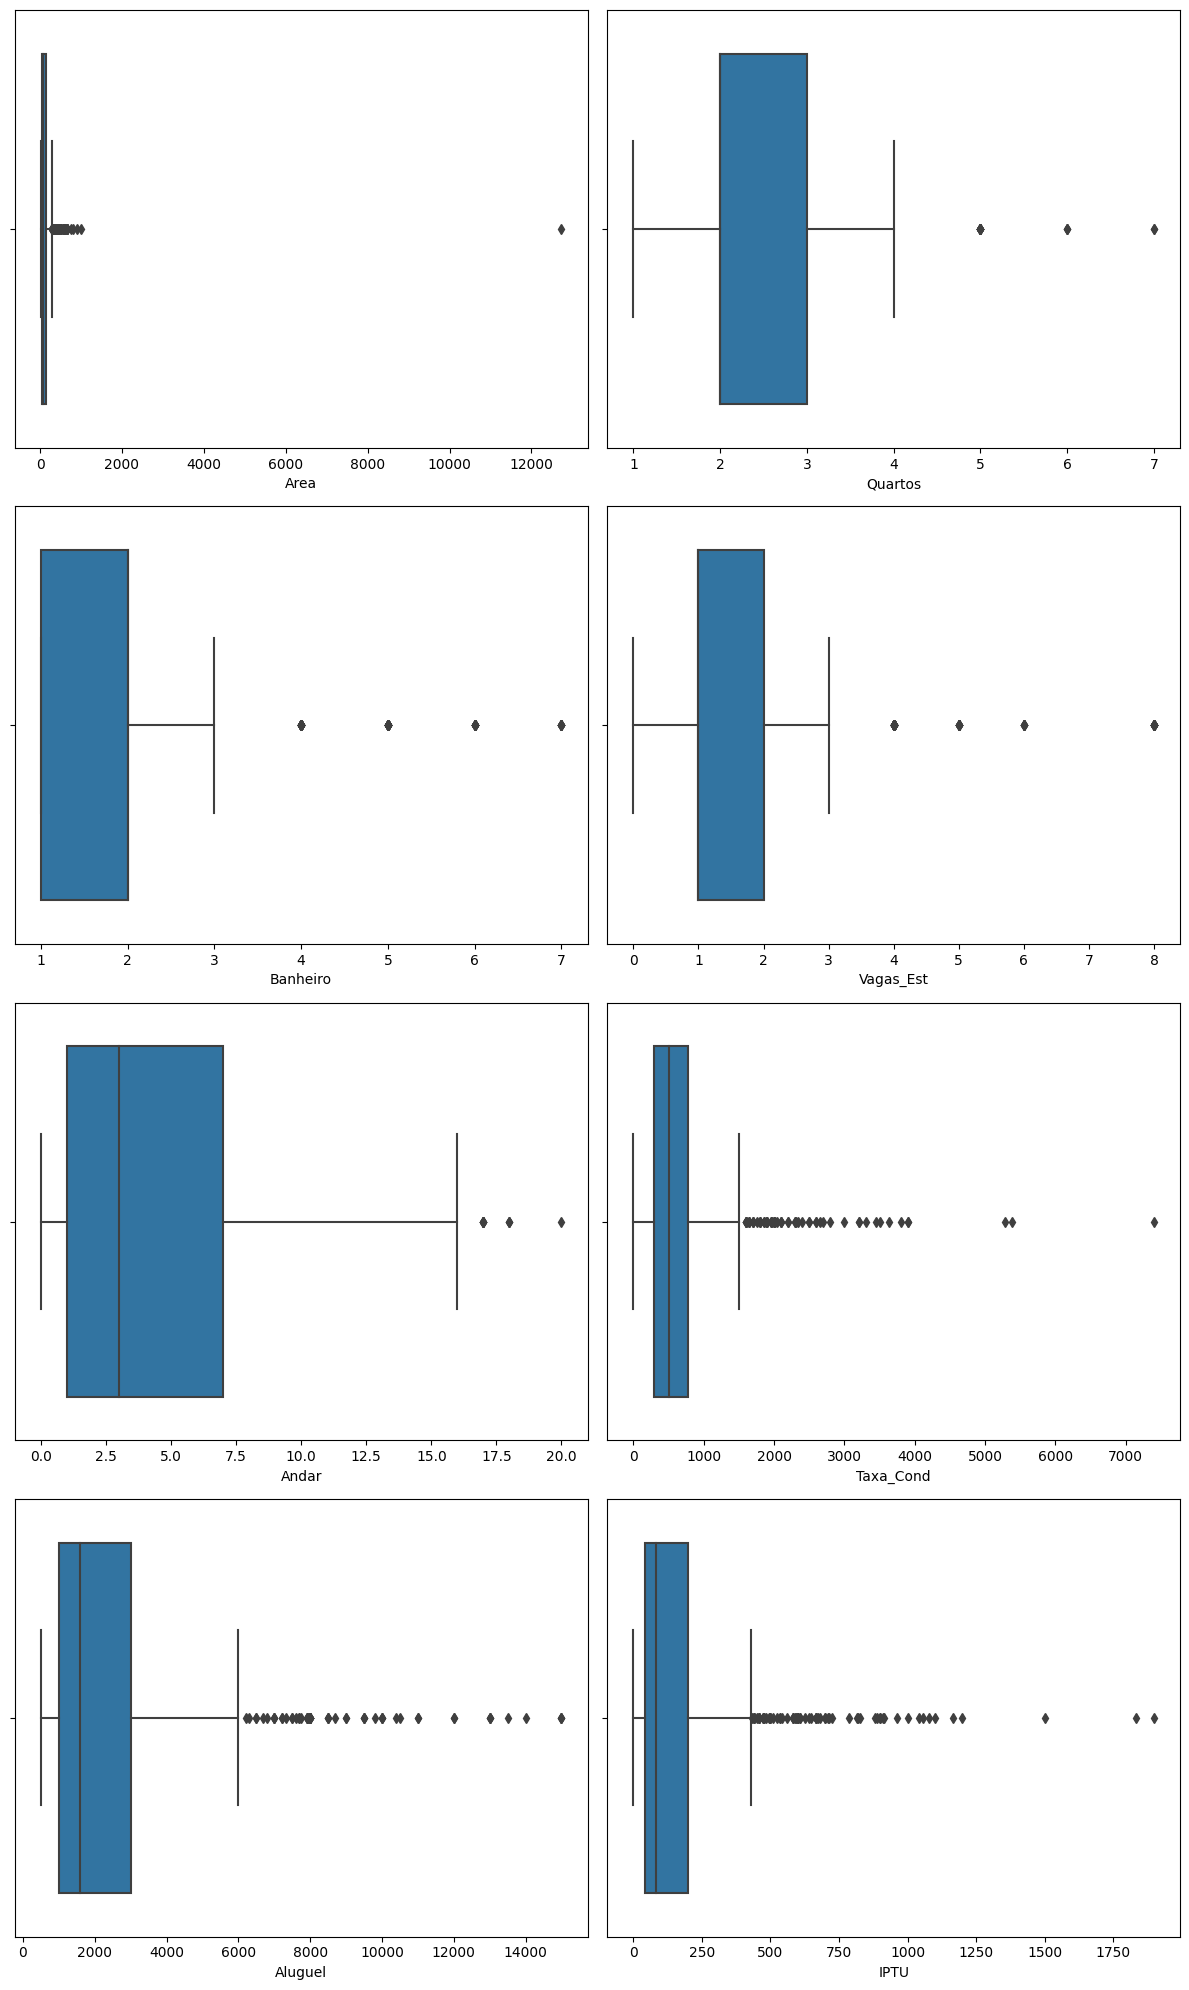

In [536]:
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
for i in range(0,8):
    sns.boxplot(ax=axes[i//2,i%2], data=df_ca, x=col_num[i])
plt.tight_layout()

In [537]:
corr_ca = df_ca.corr(numeric_only=True)
(corr_ca['Aluguel']).sort_values(ascending = False)

Aluguel           1.000000
Banheiro          0.793915
IPTU              0.736764
Vagas_Est         0.652357
Quartos           0.577587
Taxa_Cond         0.416630
Area              0.202939
aliquota          0.177405
Permitido_pets    0.100641
Mobiliado         0.095819
Andar            -0.076129
Apartamento      -0.358400
Name: Aluguel, dtype: float64

In [538]:
col_prev = corr_ca['Aluguel'][corr_ca['Aluguel']>0.4].sort_values(ascending = False).index[1:]

**Separando variável dependente e variáveis independentes**

In [539]:
X = df_ca[col_prev]
y = df_ca.Aluguel
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = .3, random_state=42)

**Aplicando scaler**

In [540]:
mms = MinMaxScaler()
mms.fit(X_train)

MinMaxScaler()

In [541]:
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

Treinando o Modelo

In [542]:
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

LinearRegression()

Verificando valores estimados

In [543]:
print("Intercepto:", reg_lin.intercept_)
print("Coeficientes angulares:", reg_lin.coef_)

Intercepto: 648.1633410050795
Coeficientes angulares: [ 4880.33556841  4474.61965638  2876.97908174 -1149.06019555
  2528.73582585]


Gráfico valor previsto x valor real

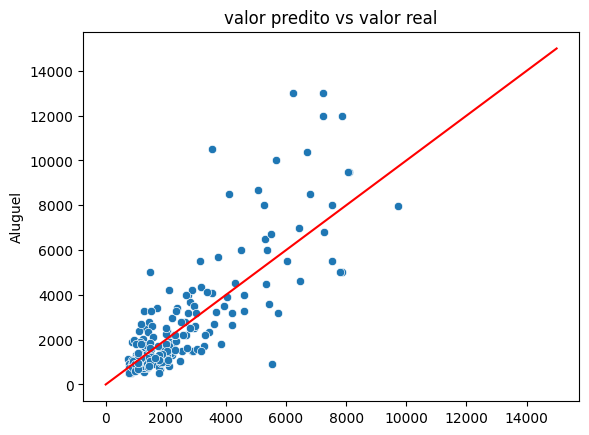

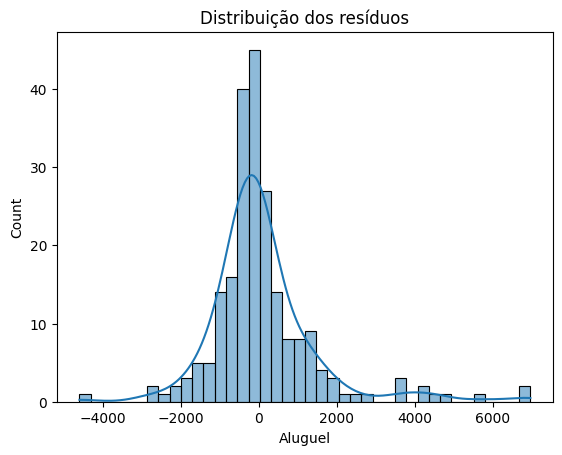

In [544]:
predictions = reg_lin.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_test)
plt.plot(np.linspace(0, 15000, 1000), np.linspace(0, 15000, 1000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-predictions, kde=True)
plt.show()

Métricas de avaliação

In [545]:
cidade = 'Campinas'
y_pred = predictions

tab_erro['R²'][cidade] = metrics.r2_score(y_test, y_pred)
tab_erro['MAE'][cidade] = metrics.mean_absolute_error(y_test, y_pred)
tab_erro['MSE'][cidade] = metrics.mean_squared_error(y_test, y_pred)
tab_erro['RMSE'][cidade] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
tab_erro['MAPE'][cidade] = mape(y_test, y_pred)

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', mape(y_test, y_pred))

R^2: 0.6851321159698778
MAE: 856.1555166659522
MSE: 1951294.1857736441
RMSE: 1396.8873203568153
MAPE: 0.39450257324700144


# São Paulo

Index(['Banheiro', 'IPTU', 'Vagas_Est', 'Quartos'], dtype='object')


LinearRegression()

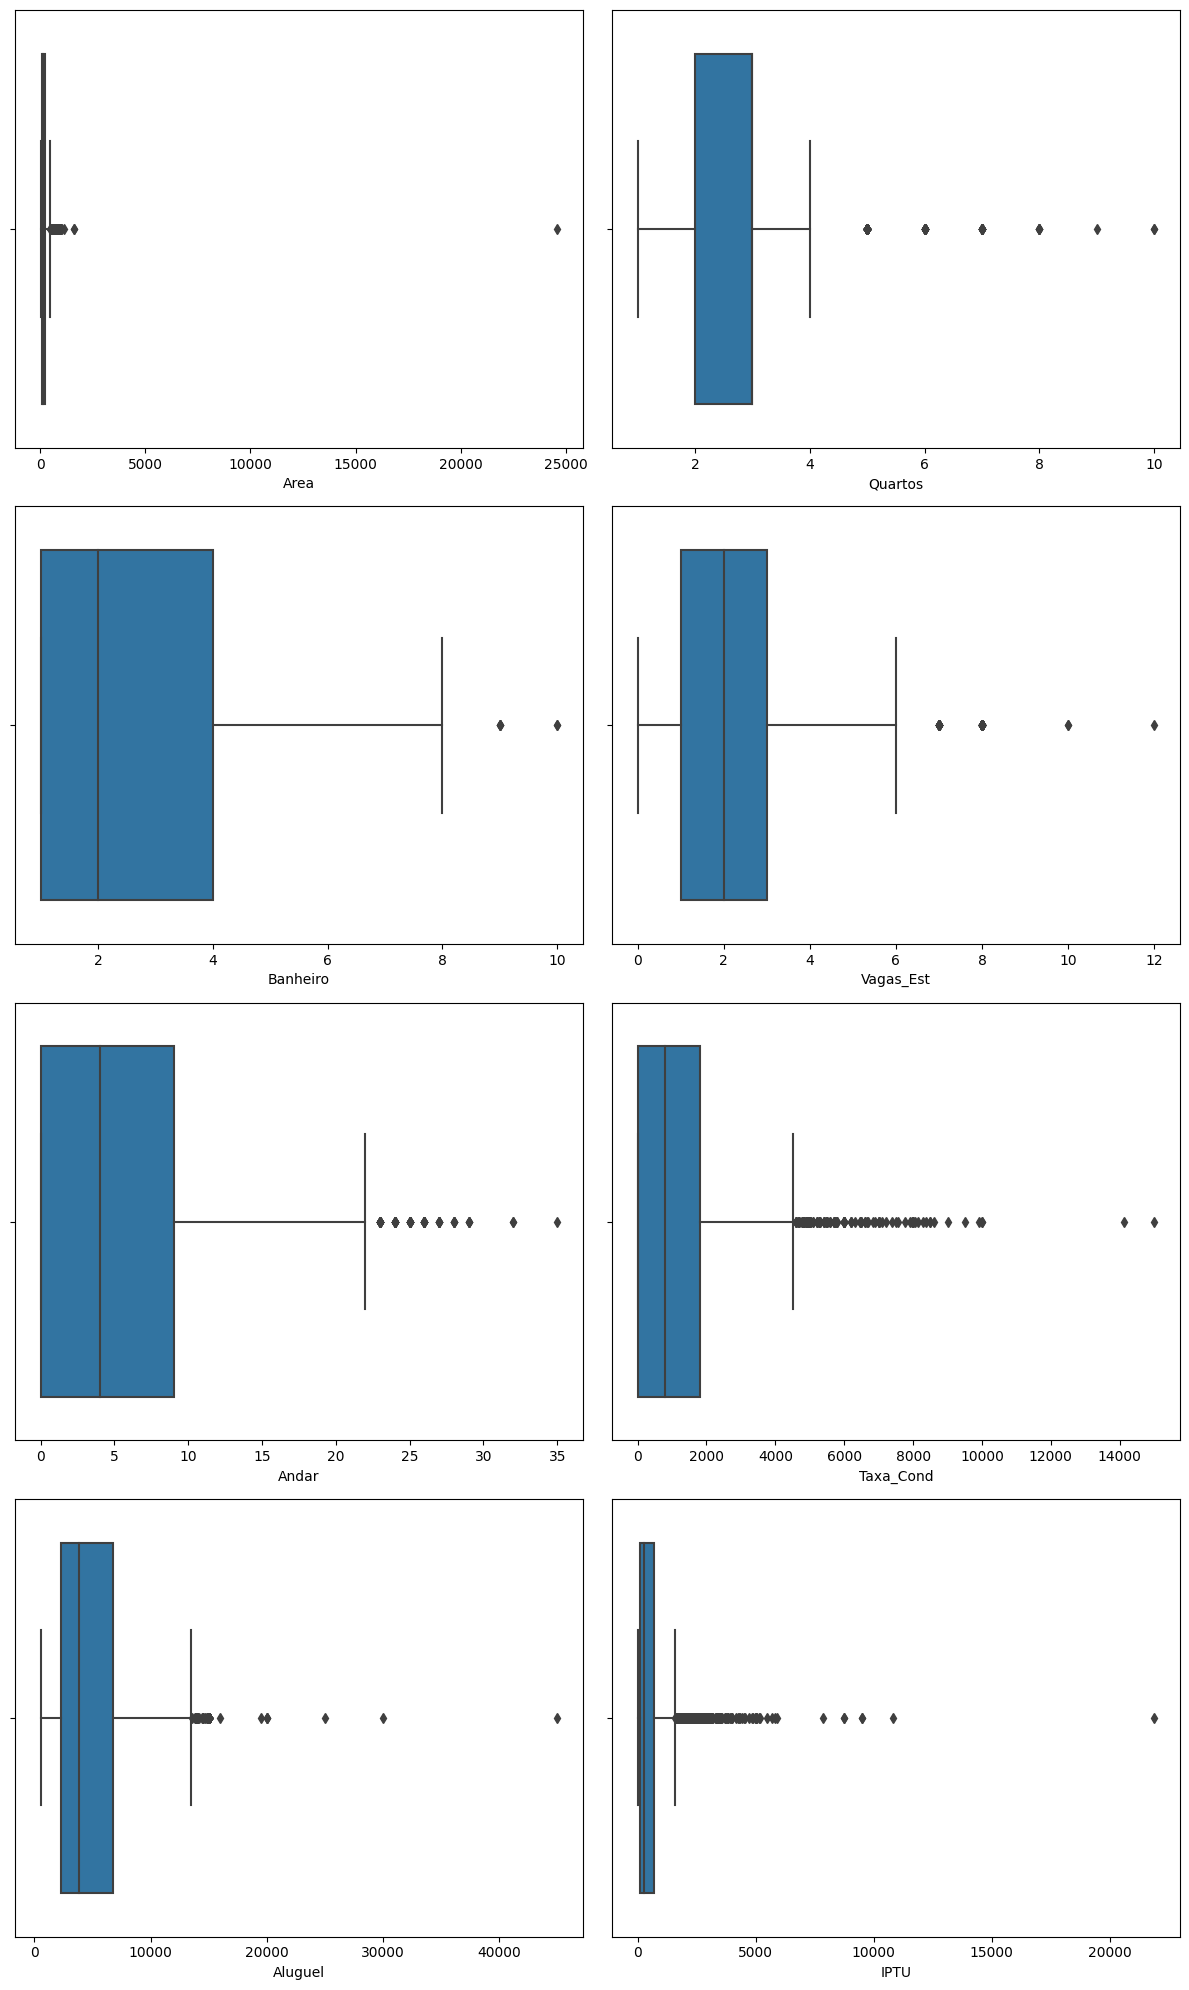

In [546]:
df_ca = df[df.Cidade == 'São Paulo']
df_ca.head()
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
for i in range(0,8):
    sns.boxplot(ax=axes[i//2,i%2], data=df_ca, x=col_num[i])
plt.tight_layout()

corr_ca = df_ca.corr(numeric_only=True)
(corr_ca['Aluguel']).sort_values(ascending = False)
col_prev = corr_ca['Aluguel'][corr_ca['Aluguel']>0.4].sort_values(ascending = False).index[1:]
print(col_prev)
X = df_ca[col_prev]

y = df_ca.Aluguel

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = .3, random_state=42)

mms = MinMaxScaler()
mms.fit(X_train)

X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)


Intercepto: 2131.631981334631
Coeficientes angulares: [ 7607.87886926 12117.10121809  3524.06844903  1277.80455257]


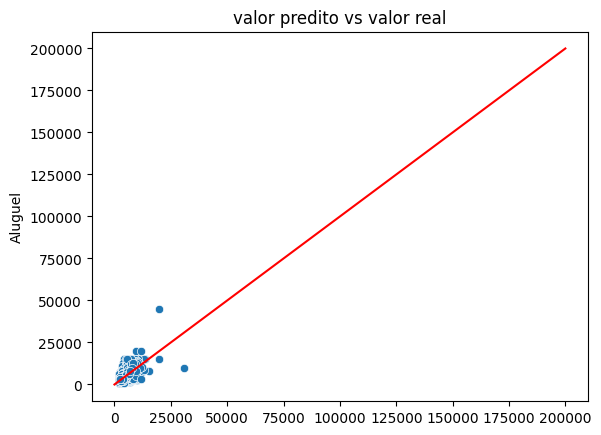

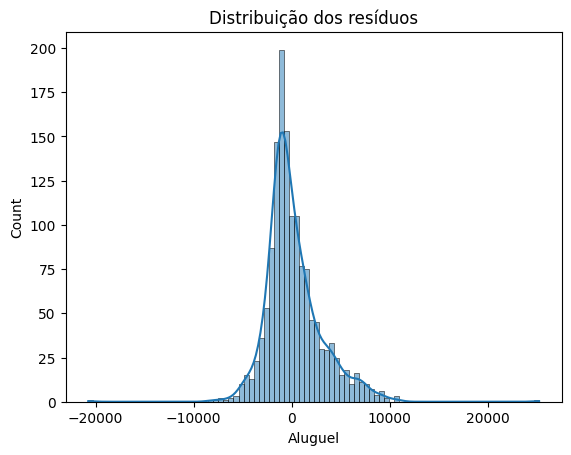

R^2: 0.4425800900683119
MAE: 2045.6540356853038
MSE: 8186899.401596018
RMSE: 2861.2758345877837
MAPE: 0.4959236381625927


In [547]:

print("Intercepto:", reg_lin.intercept_)
print("Coeficientes angulares:", reg_lin.coef_)

predictions = reg_lin.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_test)
plt.plot(np.linspace(0, 200000, 1000), np.linspace(0, 200000, 1000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-predictions, kde=True)
plt.show()

cidade = 'São Paulo'
y_pred = predictions

tab_erro['R²'][cidade] = metrics.r2_score(y_test, y_pred)
tab_erro['MAE'][cidade] = metrics.mean_absolute_error(y_test, y_pred)
tab_erro['MSE'][cidade] = metrics.mean_squared_error(y_test, y_pred)
tab_erro['RMSE'][cidade] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
tab_erro['MAPE'][cidade] = mape(y_test, y_pred)

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', mape(y_test, y_pred))

# Porto Alegre

Index(['Banheiro', 'Area', 'Vagas_Est', 'Quartos', 'IPTU'], dtype='object')


LinearRegression()

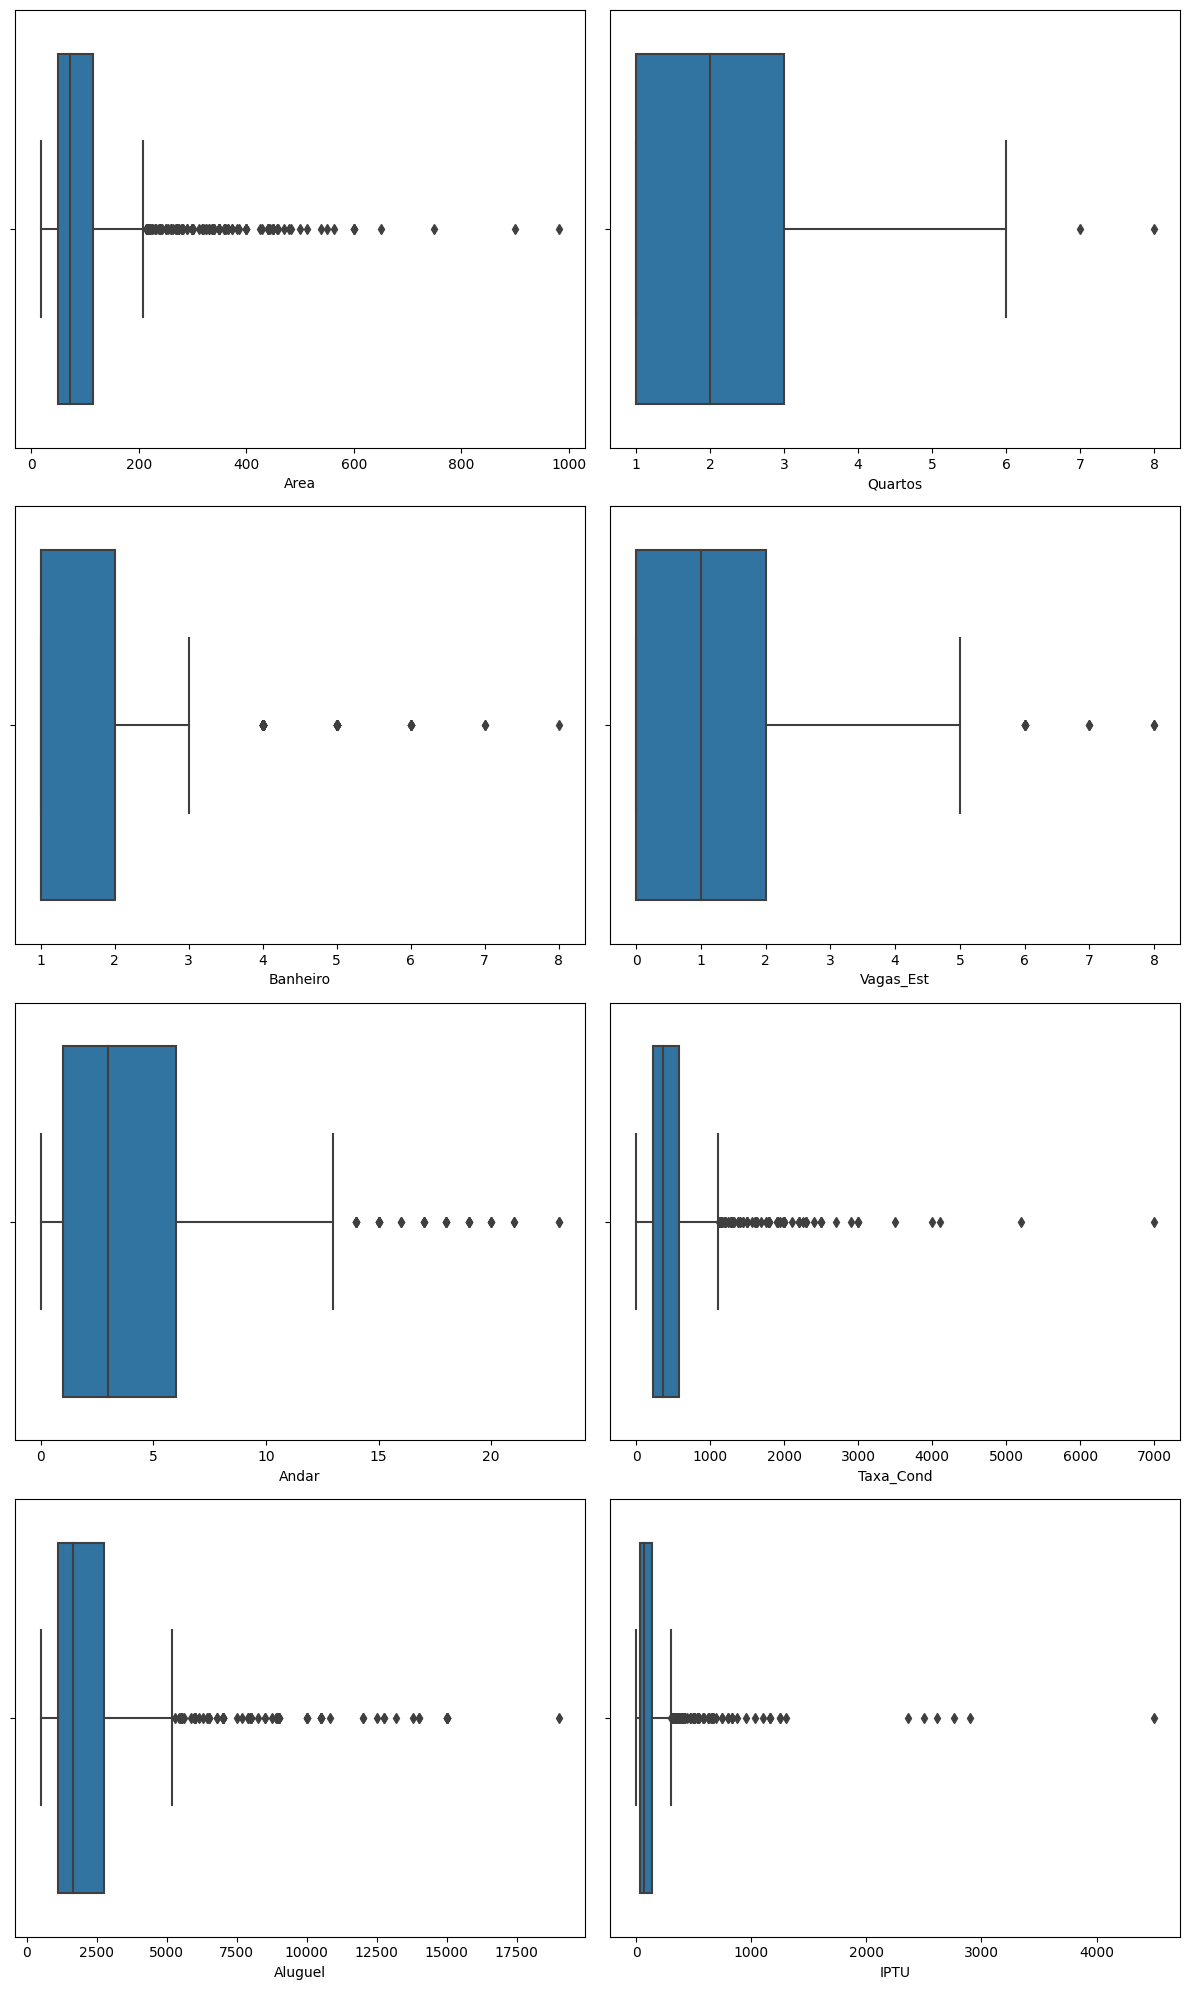

In [548]:
df_ca = df[df.Cidade == 'Porto Alegre']
df_ca.head()
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
for i in range(0,8):
    sns.boxplot(ax=axes[i//2,i%2], data=df_ca, x=col_num[i])
plt.tight_layout()
corr_ca = df_ca.corr(numeric_only=True)
(corr_ca['Aluguel']).sort_values(ascending = False)
col_prev = corr_ca['Aluguel'][corr_ca['Aluguel']>0.4].sort_values(ascending = False).index[1:]
print(col_prev)
X = df_ca[col_prev]
y = df_ca.Aluguel
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = .3, random_state=42)

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)


Intercepto: 902.8436289708422
Coeficientes angulares: [6409.29936065 5893.79104385 1448.01934084  -64.18531293 3544.27588976]


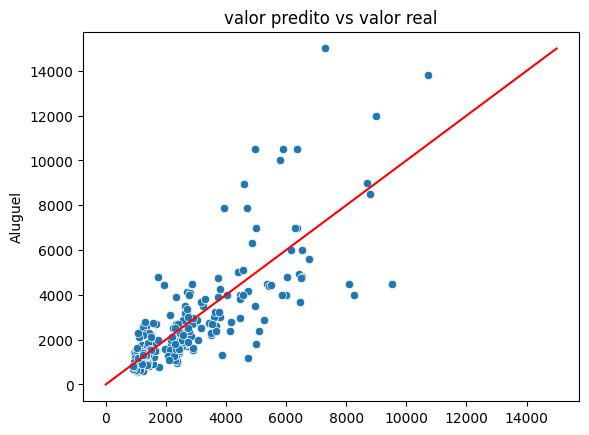

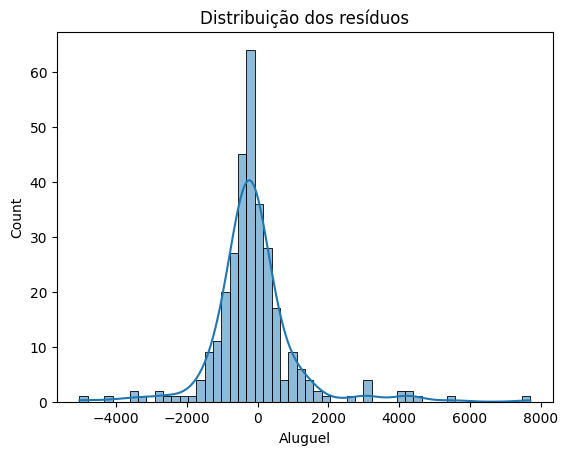

R^2: 0.6580770742152453
MAE: 744.9422605067755
MSE: 1494931.313631057
RMSE: 1222.6738377961053
MAPE: 0.33795410883384613


In [549]:

print("Intercepto:", reg_lin.intercept_)
print("Coeficientes angulares:", reg_lin.coef_)

predictions = reg_lin.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_test)
plt.plot(np.linspace(0, 15000, 1000), np.linspace(0, 15000, 1000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-predictions, kde=True)
plt.show()

cidade = 'Porto Alegre'
y_pred = predictions

tab_erro['R²'][cidade] = metrics.r2_score(y_test, y_pred)
tab_erro['MAE'][cidade] = metrics.mean_absolute_error(y_test, y_pred)
tab_erro['MSE'][cidade] = metrics.mean_squared_error(y_test, y_pred)
tab_erro['RMSE'][cidade] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
tab_erro['MAPE'][cidade] = mape(y_test, y_pred)

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', mape(y_test, y_pred))

# Rio de Janeiro

Index(['Area', 'Banheiro', 'Taxa_Cond', 'Quartos', 'Vagas_Est'], dtype='object')


LinearRegression()

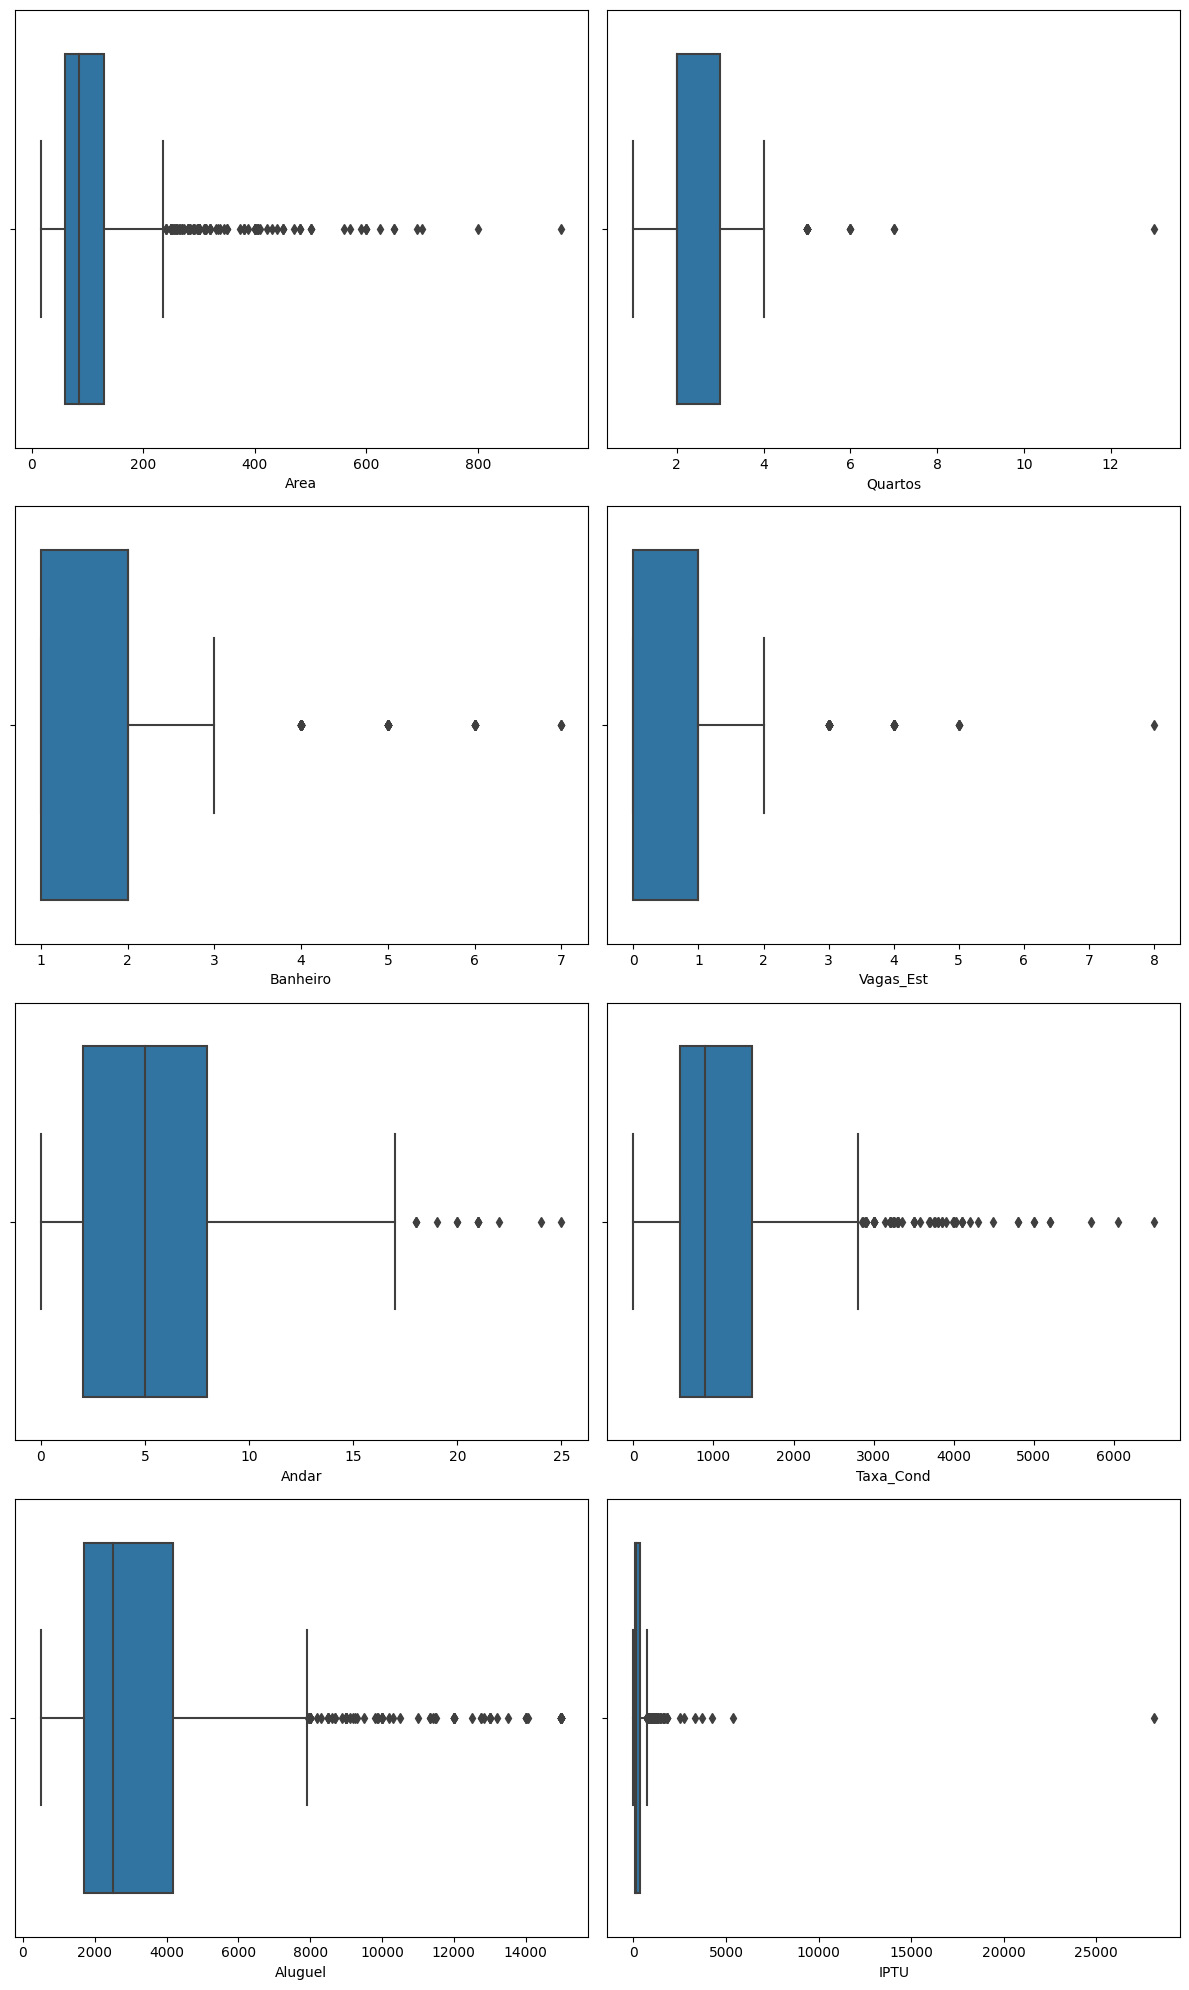

In [550]:
df_ca = df[df.Cidade == 'Rio de Janeiro']
df_ca.head()
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
for i in range(0,8):
    sns.boxplot(ax=axes[i//2,i%2], data=df_ca, x=col_num[i])
plt.tight_layout()
corr_ca = df_ca.corr(numeric_only=True)
(corr_ca['Aluguel']).sort_values(ascending = False)
col_prev = corr_ca['Aluguel'][corr_ca['Aluguel']>0.4].sort_values(ascending = False).index[1:]
print(col_prev)
X = df_ca[col_prev]
y = df_ca.Aluguel
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = .3, random_state=42)

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

Intercepto: 594.137981884091
Coeficientes angulares: [9267.20022164 1409.70268678 7211.47705334 2498.87097442  109.66078015]


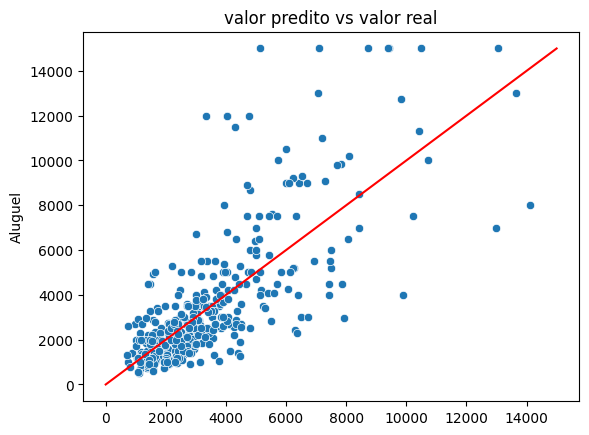

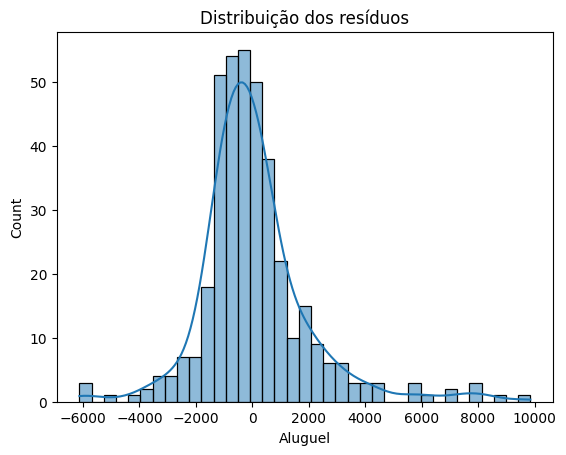

R^2: 0.5517169313335325
MAE: 1290.734600059858
MSE: 3852413.4621370654
RMSE: 1962.7565977820748
MAPE: 0.42897315846466205


In [551]:
print("Intercepto:", reg_lin.intercept_)
print("Coeficientes angulares:", reg_lin.coef_)

predictions = reg_lin.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_test)
plt.plot(np.linspace(0, 15000, 1000), np.linspace(0, 15000, 1000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-predictions, kde=True)
plt.show()

cidade = 'Rio de Janeiro'
y_pred = predictions

tab_erro['R²'][cidade] = metrics.r2_score(y_test, y_pred)
tab_erro['MAE'][cidade] = metrics.mean_absolute_error(y_test, y_pred)
tab_erro['MSE'][cidade] = metrics.mean_squared_error(y_test, y_pred)
tab_erro['RMSE'][cidade] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
tab_erro['MAPE'][cidade] = mape(y_test, y_pred)

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', mape(y_test, y_pred))

# Belo Horizonte

Index(['Banheiro', 'Vagas_Est', 'Quartos', 'IPTU'], dtype='object')


LinearRegression()

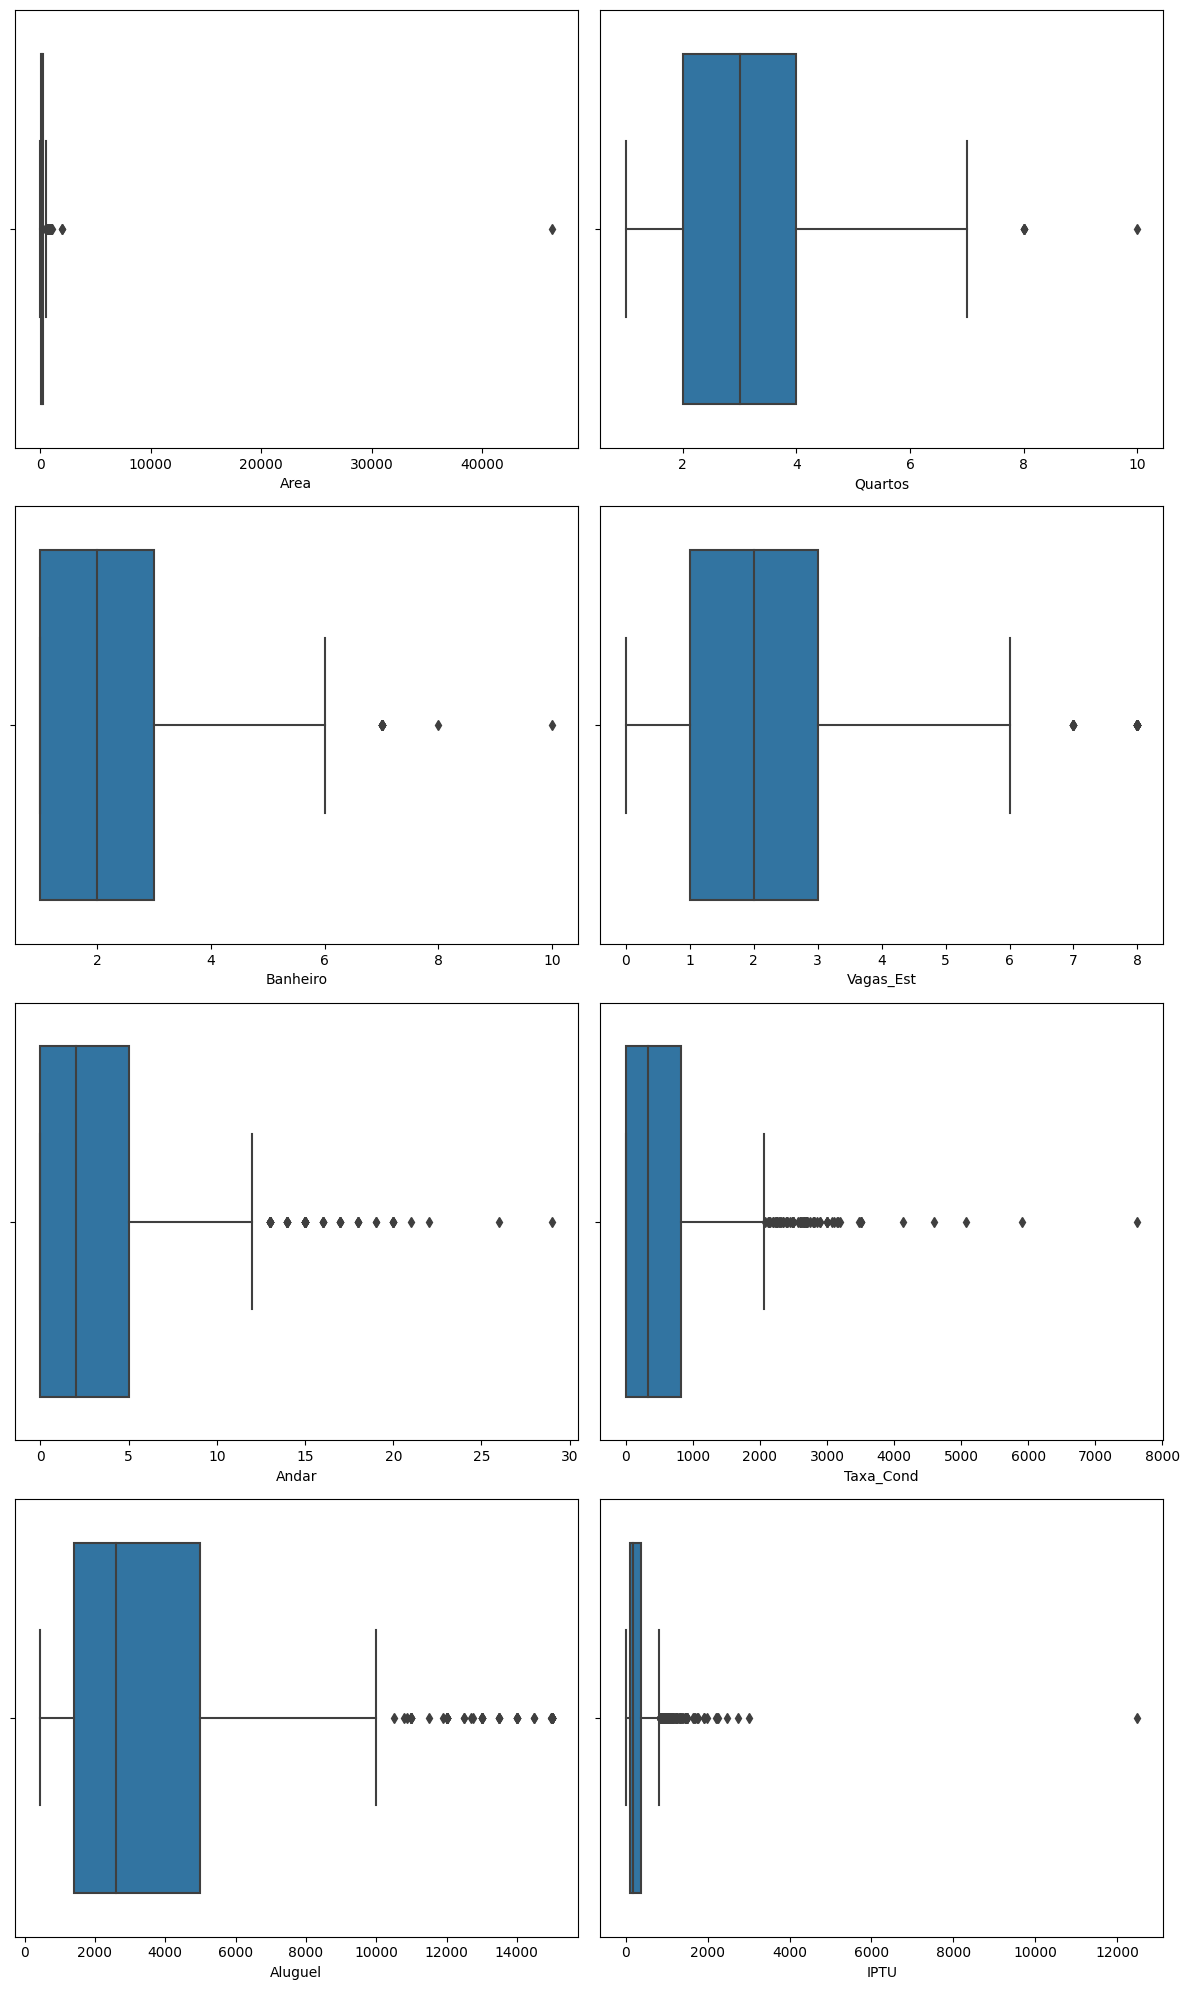

In [552]:
df_ca = df[df.Cidade == 'Belo Horizonte']
df_ca.head()
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
for i in range(0,8):
    sns.boxplot(ax=axes[i//2,i%2], data=df_ca, x=col_num[i])
plt.tight_layout()
corr_ca = df_ca.corr(numeric_only=True)
(corr_ca['Aluguel']).sort_values(ascending = False)
col_prev = corr_ca['Aluguel'][corr_ca['Aluguel']>0.4].sort_values(ascending = False).index[1:]
print(col_prev)
X = df_ca[col_prev]
y = df_ca.Aluguel
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = .3, random_state=42)

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

Intercepto: 386.3564257847729
Coeficientes angulares: [ 7138.29340299  2362.69732373  1603.42949342 11377.60556591]


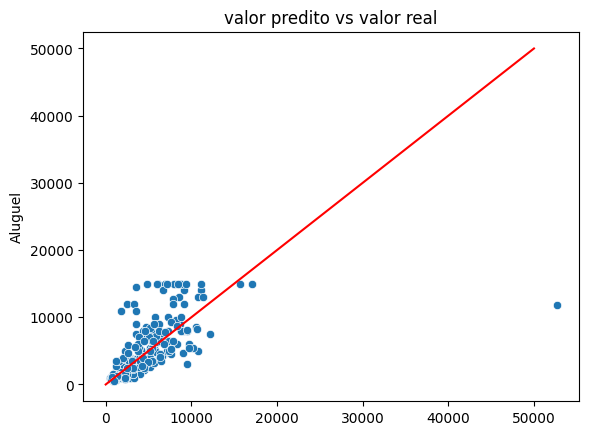

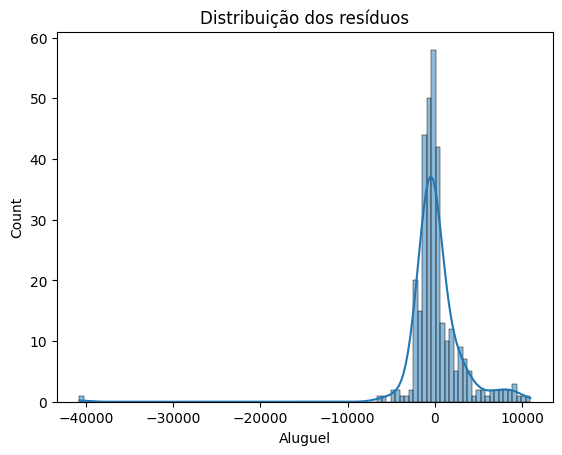

R^2: 0.2273675582283724
MAE: 1730.248867214785
MSE: 11595011.230676595
RMSE: 3405.1448178714213
MAPE: 0.4123121314195777


In [555]:
print("Intercepto:", reg_lin.intercept_)
print("Coeficientes angulares:", reg_lin.coef_)

predictions = reg_lin.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_test)
plt.plot(np.linspace(0, 50000, 1000), np.linspace(0, 50000, 1000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-predictions, kde=True)
plt.show()

cidade = 'Belo Horizonte'
y_pred = predictions

tab_erro['R²'][cidade] = metrics.r2_score(y_test, y_pred)
tab_erro['MAE'][cidade] = metrics.mean_absolute_error(y_test, y_pred)
tab_erro['MSE'][cidade] = metrics.mean_squared_error(y_test, y_pred)
tab_erro['RMSE'][cidade] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
tab_erro['MAPE'][cidade] = mape(y_test, y_pred)

print('R^2:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', mape(y_test, y_pred))

In [556]:
# Usando as features com correlação > 40%
tab_erro

,R²,MAE,MSE,RMSE,MAPE
Todas,0.505824,1715.974812,6081566.985017,2466.083329,0.539456
Campinas,0.685132,856.155517,1951294.185774,1396.88732,0.394503
São Paulo,0.44258,2045.654036,8186899.401596,2861.275835,0.495924
Porto Alegre,0.658077,744.942261,1494931.313631,1222.673838,0.337954
Rio de Janeiro,0.551717,1290.7346,3852413.462137,1962.756598,0.428973
Belo Horizonte,0.227368,1730.248867,11595011.230677,3405.144818,0.412312


In [458]:
# Usando as features com correlação > 50%
tab_erro

,R²,MAE,MSE,RMSE,MAPE
Todas,0.479636,1780.14785,6403848.348837,2530.582611,0.571378
Campinas,0.688383,858.805379,1931145.103333,1389.65647,0.398082
São Paulo,0.44258,2045.654036,8186899.401596,2861.275835,0.495924
Porto Alegre,0.662549,741.938561,1475378.975021,1214.651792,0.337696
Rio de Janeiro,0.551597,1290.787107,3853444.352879,1963.019193,0.428635
Belo Horizonte,0.227368,1730.248867,11595011.230677,3405.144818,0.412312


In [506]:
# Usando todas as features
tab_erro

,R²,MAE,MSE,RMSE,MAPE
Todas,0.547155,1625.734769,5572923.068757,2360.703935,0.498366
Campinas,0.709931,804.729738,1797613.715745,1340.751176,0.355408
São Paulo,-1.678261,1990.935021,39335963.97279,6271.838963,0.441432
Porto Alegre,0.68775,727.386419,1365196.81327,1168.41637,0.337138
Rio de Janeiro,0.589515,1238.070092,3527590.690779,1878.18814,0.39335
Belo Horizonte,-0.828795,1831.866374,27445003.167991,5238.797874,0.454314
